# Loading the required libraries

In [21]:
# libraries for dataframe
import pandas as pd
import numpy as np
from datetime import datetime

# libraries for visulisation
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Set2')


# Libraries for machine learning processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from imblearn.over_sampling import ADASYN

# Libraries for classifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
 
# evaluation metrics
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# libraries for explanability
from shapash.explainer.smart_explainer import SmartExplainer
import shap

# library to ignore warnings
import warnings
warnings.filterwarnings('ignore')


# resetting the column-rows defult display option
pd.options.display.max_columns = 200
pd.options.display.max_rows = 500

In [2]:
# function for execution timer
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [161]:
# start of the process
start_time_adasyn = timer(None) 


# Individual Dataset

## Preprocessing

In [4]:
# reading the csv file
individual_df=pd.read_csv('individual_df.csv').iloc[:,1:]

In [5]:
# spliting the target feature
individual_X=individual_df.drop('target',axis=1)
individual_y=individual_df['target']

In [6]:
print('shape of X: ',individual_X.shape)
print('shape of y: ',individual_y.shape)

shape of X:  (1319544, 65)
shape of y:  (1319544,)


In [7]:
# splitting the train and test dataset
individual_X_train, individual_X_test, individual_y_train, individual_y_test = train_test_split(
    individual_X, individual_y, test_size=0.3, random_state=44)

In [8]:
# selecting only numerical feature for scaling purpose
cat_var_ind=pd.Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length','home_ownership', 'verification_status', 
                      'issue_d', 'purpose', 'title', 'addr_state', 'earliest_cr_line', 'initial_list_status',
                      'last_pymnt_d', 'last_credit_pull_d', 'disbursement_method','debt_settlement_flag'])
num_var_ind=individual_X_train.columns
num_var_ind=num_var_ind.drop(cat_var_ind)
len(num_var_ind)

48

In [9]:
# scaling the individual train dataset
scaler = StandardScaler()
individual_X_train[num_var_ind]=scaler.fit_transform(individual_X_train[num_var_ind])
individual_X_train.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range
464781,-0.967621,0,-0.255010,-0.946137,2,10,147770,1,1,-0.771487,1,52016,4,25120,0.698969,36,1.378723,42002,1.901043,1.132705,-1.184902,-1.744217,0.800026,1,-0.769591,-0.767312,-0.699443,-0.635912,32019,-0.830856,32019,-0.800328,-0.809256,0.479344,-0.879460,-0.214830,-1.968826,0.392568,-0.118581,0.695153,-0.581419,0.732861,-0.168845,-0.895237,-0.571356,0.188991,0.145468,-0.257255,0.506678,0.506122,1.010705,0.791182,0.159576,1.142810,-0.069896,-1.190199,-1.286757,-0.734542,-0.403986,-0.858396,0.321917,0,0,-0.348434,-1.590687
279048,-0.734850,0,-0.354715,-0.681046,1,9,248663,2,5,-1.065252,0,42015,1,12817,-1.282817,34,-1.112596,11983,-0.784949,-0.697518,-0.646081,-0.543629,-0.336279,1,-0.997280,-0.995024,-0.967343,-0.591249,112016,-0.793155,52017,0.990408,-0.567485,-0.918260,1.782886,-0.496963,-1.365783,0.061236,2.325103,1.268164,2.405454,1.816354,2.144277,2.376722,0.925841,-0.806546,0.145468,-1.086762,-0.471807,-1.423775,-0.285877,0.225568,0.159576,-0.726054,-1.322555,-2.132147,-1.286757,0.764746,-1.235848,-0.956797,-1.264103,0,0,-0.008560,-1.714835
1127189,-0.502079,0,-0.226832,-0.399066,1,7,291339,1,5,-1.102973,2,112012,2,20597,1.338255,4,0.054758,91985,-0.784949,0.115914,0.226604,0.218520,0.100761,0,-0.269594,-0.267266,-0.242130,-0.097142,122015,-0.781550,42018,-0.928000,-0.022213,-1.267661,-0.952421,-0.330287,0.345261,0.061236,1.803151,-0.565473,-0.208060,0.732861,-0.804954,2.376722,0.925841,2.677834,1.885760,2.231266,2.219027,-1.423775,1.010705,1.215392,1.921145,0.104553,-0.696225,0.184119,0.294733,-0.972733,-0.925499,-0.130225,-1.264103,0,0,-0.178497,0.147379
344715,0.079848,0,-0.374222,0.262945,1,8,179652,1,1,-0.674327,1,12015,2,16292,-0.196031,35,1.890720,71989,0.558047,-0.494160,-0.650737,1.169156,-0.248871,0,0.314423,0.313827,0.329511,0.349933,22018,-0.754276,32019,0.629616,-1.071604,0.479344,1.278035,-0.844195,0.861117,0.463568,1.506588,-0.680075,-0.581419,2.358100,-0.804954,-0.125365,-0.571356,-0.308777,-0.550649,-0.672008,-0.961049,-0.020213,-0.804509,-0.905659,-0.545051,-0.518402,0.556434,0.801790,1.557649,0.489730,-0.536645,-0.786235,-0.140085,0,0,-1.198120,0.023231
904403,2.058401,1,2.075059,1.915349,6,30,304831,1,5,1.011680,2,112011,2,14853,0.443255,24,-1.513761,61995,-0.784949,-1.510951,0.371854,1.455986,-0.336279,0,2.523411,2.523920,2.273091,2.231550,42013,2.387942,72015,0.054254,0.157109,0.129943,0.103371,0.247122,0.000146,0.061236,0.023769,0.236743,0.165300,0.191114,0.235951,0.067104,0.925841,0.188991,0.145468,0.157499,0.017436,0.155232,-0.026560,0.084164,0.159576,0.104553,-0.069896,-0.124717,-0.006774,0.054842,0.138921,0.115122,0.101918,0,0,-0.858246,0.457748


In [10]:
# scaling the individual test dataset

individual_X_test[num_var_ind]=scaler.transform(individual_X_test[num_var_ind])
individual_X_test.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range
344869,1.592859,0,-1.338762,1.780528,0,2,362600,8,1,0.783069,1,12015,1,12817,1.306290,4,-0.647582,71985,-0.784949,0.522630,1.239061,-0.228116,1.324474,1,1.647903,1.650421,1.815778,0.490489,82017,0.026586,32019,1.398763,1.567305,-0.918260,1.030325,2.125758,-0.344969,-0.625095,0.415233,0.122141,0.912018,2.358100,0.409436,2.376722,0.925841,1.184528,0.145468,2.231266,2.219027,-0.721994,0.751388,1.922409,0.159576,0.519856,-0.696225,0.415745,-0.655299,1.432866,0.033697,2.264210,-0.065059,0,0,0.501252,1.699223
1300957,1.243703,1,2.562748,1.552001,5,27,292057,1,1,-0.274258,2,112016,2,16292,-0.867281,45,0.783601,121996,0.558047,0.929346,-0.782931,-0.605092,0.974842,1,2.169538,2.172106,1.472794,2.231550,62018,2.387942,32019,-0.602824,-0.737239,1.876947,-0.767350,-0.943685,0.897445,1.646898,-0.569358,-0.794677,-0.768098,-0.892378,-0.920610,-0.702769,-0.571356,-0.806546,0.145468,-1.086762,-1.205670,2.260574,1.010705,-0.198642,0.159576,0.935159,1.809092,-0.062949,1.557649,-0.627258,0.402778,-1.101119,0.766408,0,0,0.161377,0.209452
1217813,-0.618464,0,-1.208712,-0.613820,0,2,4677,4,1,-0.302834,0,72016,6,30411,0.826826,43,0.355933,12003,-0.784949,-0.494160,-0.976932,-1.662265,-0.685911,1,-0.475869,-0.473561,-0.356458,-0.680843,52018,-0.153981,122018,-0.599517,0.101245,-0.918260,-0.226553,2.125758,-1.761757,-2.234423,-0.201619,2.070380,-0.954778,-0.892378,1.276856,-0.895237,-0.571356,-0.806546,-1.246766,-0.257255,0.017436,-0.897439,-0.285877,-0.057239,-1.249679,-0.518402,-0.696225,0.801790,-1.286757,-0.528567,0.416284,0.735707,0.686662,0,0,2.540498,1.699223
467206,-0.734850,0,0.280364,-0.634767,2,13,200368,8,5,-0.588598,2,52016,10,22995,-1.059067,38,-1.123438,62003,1.901043,-1.307593,-1.133685,-1.076313,-1.122952,1,-1.081318,-1.079070,-1.076229,-0.542788,82017,-0.742180,22019,1.053620,-1.153909,-1.267661,2.387746,-0.334955,-1.249533,0.534568,-1.423461,2.070380,0.725338,-0.350632,0.756404,-1.280174,-0.571356,-1.304314,-1.594824,-1.086762,-0.961049,-0.721994,-1.582458,-1.188466,-1.601992,-1.349008,-0.696225,0.801790,-1.286757,0.826882,-1.024230,-0.825595,-0.637110,0,0,-1.198120,-2.180388
865505,0.079848,0,-1.202209,0.153129,0,2,140025,9,5,-0.550477,1,12014,2,16292,-1.186924,34,-0.160883,91999,-0.784949,0.522630,-0.321711,-0.678848,0.800026,1,0.217318,0.219693,0.329511,-0.186530,12017,-0.758816,12017,-0.826263,0.039516,0.129943,-0.848941,0.229066,-0.366765,1.149899,-0.225344,0.007539,0.725338,-0.892378,-0.226673,1.799317,-0.571356,-0.308777,-0.550649,0.157499,0.751299,0.681568,0.751388,1.073988,-0.545051,0.519856,-0.696225,0.801790,-0.575655,-0.705135,-0.509925,0.007537,-0.080813,0,0,1.350938,1.326780


## Resampling of train dataset 

**ADAYSN**

In [11]:
# oversampling the minority class using ADASYN algorithm
adasyn=ADASYN(sampling_strategy='minority',random_state=100,n_neighbors=4)

# fitting the dataset for resampling
start_time = timer(None) # timing starts from this point for "start_time" variable
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(individual_X_train, individual_y_train)
timer(start_time)


 Time taken: 1 hours 33 minutes and 56.95 seconds.


## Modeling

### XGBoost Model

#### Model Learning

In [ ]:
# initializing the classifier
xg_clf_adasyn=XGBClassifier(random_state=100)

# fitting the model on resampled dataset
start_time = timer(None) # start time
xg_clf_adasyn.fit(X_resampled_adasyn,y_resampled_adasyn)
timer(start_time) # end time

In [15]:
# prediction of resampled train dataset
y_train_pred_adasyn_xg=xg_clf_adasyn.predict(X_resampled_adasyn)

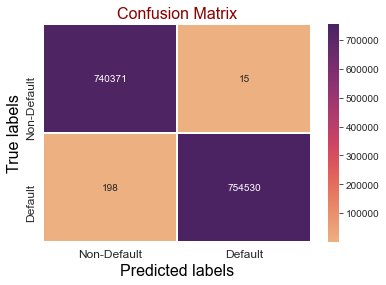

Confusion matrix values
 [[740371     15]
 [   198 754530]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000    740386
           1      1.000     1.000     1.000    754728

    accuracy                          1.000   1495114
   macro avg      1.000     1.000     1.000   1495114
weighted avg      1.000     1.000     1.000   1495114



ROC_AUC score : 99.986%


In [16]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_adasyn_xg=metrics.confusion_matrix(y_resampled_adasyn,y_train_pred_adasyn_xg)

ax= plt.subplot()
sns.heatmap(cm_train_adasyn_xg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_adasyn_xg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(y_resampled_adasyn,y_train_pred_adasyn_xg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(y_resampled_adasyn,y_train_pred_adasyn_xg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Evaluation for test dataset

In [18]:
# prediction for test dataset 
y_pred_test_adasyn_xg=xg_clf_adasyn.predict(individual_X_test)

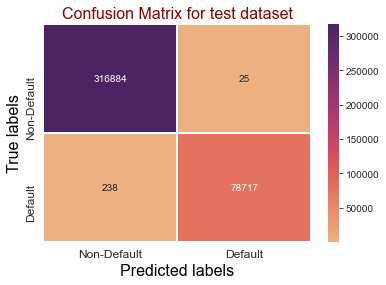

Confusion matrix values
 [[316884     25]
 [   238  78717]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     1.000    316909
           1      1.000     0.997     0.998     78955

    accuracy                          0.999    395864
   macro avg      0.999     0.998     0.999    395864
weighted avg      0.999     0.999     0.999    395864



ROC_AUC score : 99.845%


In [19]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_adasyn_xg=metrics.confusion_matrix(individual_y_test,y_pred_test_adasyn_xg)

ax= plt.subplot()
sns.heatmap(cm_test_adasyn_xg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix for test dataset',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_adasyn_xg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_test,y_pred_test_adasyn_xg,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(individual_y_test,y_pred_test_adasyn_xg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

#### Explainability of the result

In [22]:
# compiling the test dataset
start_time = timer(None) # start time

xpl_xg = SmartExplainer()
xpl_xg.compile(
    x=individual_X_test,
    model=xg_clf_adasyn,
   
)

timer(start_time)   # end time

Backend: Shap TreeExplainer

 Time taken: 0 hours 1 minutes and 32.79 seconds.


In [23]:
# converting the test prediction from array to series and reindexing the output result as per original indexing
y_test_pred_adasyn_xg=pd.Series(y_pred_test_adasyn_xg)
y_test_pred_adasyn_xg.index=individual_y_test.index
y_test_pred_adasyn_xg.head()

344869     0
1300957    0
1217813    0
467206     1
865505     0
dtype: int64

In [24]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_xg = xpl_xg.to_smartpredictor()
predictor_xg.add_input(x=individual_X_test, ypred=y_test_pred_adasyn_xg)
detailed_contributions_xg = predictor_xg.detail_contributions()

timer(start_time)   # end time


 Time taken: 0 hours 3 minutes and 39.19 seconds.


In [25]:
# top 5 rows of feature contribution of the predicted result
detailed_contributions_xg.head()

,ypred,proba,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range
344869,0,0.999989,-3.406218,0.004907,-0.056295,-0.998286,-0.006604,0.005729,-0.115657,0.123153,-0.022565,0.03404,-0.067503,-0.090282,-0.013853,0.019455,0.153251,0.010739,0.041649,0.021869,0.105329,0.008826,0.085891,-0.050693,0.010353,-0.0,-0.023156,-0.006627,9.891355,-0.045692,-0.160045,2.690213,0.187917,0.022564,0.039625,-0.056477,0.002571,-0.051261,-0.012398,0.012171,-0.079242,0.036033,0.001507,0.082731,-0.224112,-0.055449,0.169821,-0.016068,0.028317,-0.012944,-0.034621,-0.058241,0.000359,0.012674,-0.007602,0.022311,0.001434,-0.08024,-0.078932,-0.031922,-0.071074,0.002615,0.005371,-0.0,0.053752,-0.048028,3.574254
1300957,0,0.999911,-4.087036,-0.009115,-0.024008,-0.857168,0.979285,-0.859409,-0.064783,-0.086262,-0.102661,0.207587,0.003112,-0.186038,0.046392,-0.115722,-0.007093,-0.032688,0.062633,-0.05668,0.068199,0.010175,-0.097071,-0.00307,0.048425,-0.0,-0.026631,-0.293846,10.028474,-0.340868,-0.017365,2.212361,-0.036651,-0.012168,0.058216,0.173296,0.039868,0.057032,-0.053573,-0.019838,0.035209,0.093386,-0.00063,0.059817,0.044574,0.056782,0.003423,0.003502,-0.005741,0.012611,0.028336,-0.000592,0.000475,0.032476,-0.015882,0.041908,-0.023982,-0.075137,0.129665,0.0679,0.148504,-0.031966,-0.061714,-0.0,0.062723,0.012186,2.200503
1217813,0,0.999989,1.719918,0.003026,-0.019437,0.671095,-0.034929,0.026838,0.033589,0.140738,0.005848,0.112447,-0.102548,-0.002592,0.029702,-0.016365,0.049496,0.046417,0.100026,-0.001857,0.070187,0.001142,-0.035348,-0.048507,-0.006194,-0.0,-0.000684,0.017941,1.606718,0.199751,-0.237042,2.96199,0.269241,-0.007486,-0.010294,-0.005231,-0.008266,0.037649,0.02617,-0.008883,0.045596,-0.001165,-0.088799,0.069776,-0.047886,-0.02912,0.023247,0.012507,0.077235,0.0191,0.161482,-0.08162,0.000345,0.000432,-0.008205,-0.008172,0.000615,0.023397,0.046666,-0.007501,0.115944,0.01116,0.022622,-0.0,0.054409,-0.031181,3.554526
467206,1,0.999999,2.519572,-0.003751,0.00664,0.162872,0.102839,0.016711,-0.008577,-0.117689,-0.04972,-0.03854,-0.164775,-0.061028,0.041078,0.000633,-0.0497,0.094947,-0.03134,-0.022298,0.017079,0.015352,0.124579,-0.067892,0.011223,0.0,0.017084,-0.004582,8.40756,0.014131,0.183484,0.27909,-0.345389,-0.049089,-0.076425,0.04002,-0.039386,0.016117,-0.001753,-0.006898,0.045177,0.030355,0.003948,0.011812,-0.017363,-0.076432,-0.031902,-0.001403,-0.01401,-0.011655,-0.021235,0.051763,0.047927,0.048635,0.032537,0.001376,-0.004013,-0.010435,-0.044105,-0.003494,0.001832,-0.01063,0.000744,0.0,-0.043817,-0.044876,2.938746
865505,0,0.999939,-0.381958,0.005959,-0.029092,-0.276839,-0.188457,0.017059,0.075584,0.29213,0.044931,0.059407,-0.098055,0.163938,0.044816,-0.039176,-0.013592,-0.001051,0.003593,0.006475,0.116141,0.008201,-0.030486,-0.036609,-0.012217,-0.0,0.017849,0.009401,6.853213,0.064082,0.273827,-1.089125,0.33884,-0.01519,0.010708,0.073702,-0.020945,0.010682,-0.040134,-0.000898,-0.008657,-0.015969,0.000353,0.066033,-0.117271,-0.05996,0.009264,0.031018,0.00043,0.001939,-0.088317,0.083645,0.001723,-0.000321,-0.006693,0.002536,0.008745,-0.006343,-0.031867,0.049098,-0.059493,0.024063,0.034471,-0.0,0.

In [26]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_xg.modify_mask(max_contrib=5)
explanation_xg = predictor_xg.summarize()
explanation_xg.head()

timer(start_time)   # end time


 Time taken: 0 hours 1 minutes and 17.39 seconds.


In [27]:
# top 5 rows of the predicted result with top 5 feature contribution
explanation_xg.head()

,ypred,proba,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3,feature_4,value_4,contribution_4,feature_5,value_5,contribution_5
344869,0,0.999989,total_rec_prncp,1.815778,9.891355,avg_last_fico_range,1.699223,3.574254,loan_amnt,1.592859,-3.406218,last_pymnt_amnt,0.026586,2.690213,installment,1.780528,-0.998286
1300957,0,0.999911,total_rec_prncp,1.472794,10.028474,loan_amnt,1.243703,-4.087036,last_pymnt_amnt,2.387942,2.212361,avg_last_fico_range,0.209452,2.200503,grade,5.0,0.979285
1217813,0,0.999989,avg_last_fico_range,1.699223,3.554526,last_pymnt_amnt,-0.153981,2.96199,loan_amnt,-0.618464,1.719918,total_rec_prncp,-0.356458,1.606718,installment,-0.61382,0.671095
467206,1,0.999999,total_rec_prncp,-1.076229,8.40756,avg_last_fico_range,-2.180388,2.938746,loan_amnt,-0.73485,2.519572,last_credit_pull_d,22019.0,-0.345389,last_pymnt_amnt,-0.74218,0.27909
865505,0,0.999939,total_rec_prncp,0.329511,6.853213,avg_last_fico_range,1.32678,3.652807,last_pymnt_amnt,-0.758816,-1.089125,loan_amnt,0.079848,-0.381958,last_credit_pull_d,12017.0,0.33884


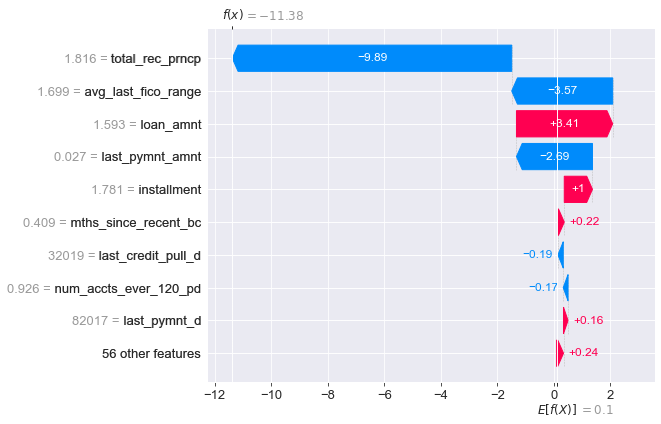


 Time taken: 0 hours 1 minutes and 27.89 seconds.


In [28]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explainer_xg = shap.Explainer(xg_clf_adasyn)
shap_values_xg = explainer_xg(individual_X_test)
#shap.summary_plot(shap_values, individual_X_test, plot_type="bar")
shap.plots.waterfall(shap_values_xg[0])

timer(start_time)   # end time

In [29]:
# plotting the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values_xg[0])

### LightGBM Model

#### Model Learning

In [30]:
# initializing the classifier
lg_clf_adasyn=LGBMClassifier(random_state=100)

# fitting the model on resampled dataset
start_time = timer(None) # start time
lg_clf_adasyn.fit(X_resampled_adasyn,y_resampled_adasyn)
timer(start_time) # end time


 Time taken: 0 hours 0 minutes and 26.39 seconds.


In [32]:
# prediction of resample train dataset using lgbm classifier
y_pred_train_adasyn_lg=lg_clf_adasyn.predict(X_resampled_adasyn)

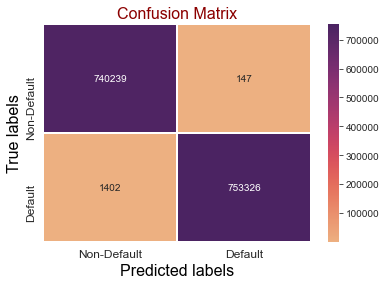

Confusion matrix values
 [[740239    147]
 [  1402 753326]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999    740386
           1      1.000     0.998     0.999    754728

    accuracy                          0.999   1495114
   macro avg      0.999     0.999     0.999   1495114
weighted avg      0.999     0.999     0.999   1495114



ROC_AUC score : 99.897%


In [34]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_adasyn_lg=metrics.confusion_matrix(y_resampled_adasyn,y_pred_train_adasyn_lg)

ax= plt.subplot()
sns.heatmap(cm_train_adasyn_lg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_adasyn_lg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(y_resampled_adasyn,y_pred_train_adasyn_lg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(y_resampled_adasyn,y_pred_train_adasyn_lg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### evaluation of test dataset

In [35]:
# prediction of test dataset using lg smote classifier
y_pred_test_adasyn_lg=lg_clf_adasyn.predict(individual_X_test)

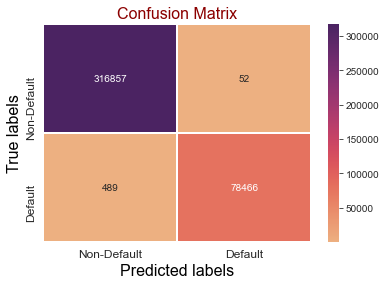

Confusion matrix values
 [[316857     52]
 [   489  78466]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999    316909
           1      0.999     0.994     0.997     78955

    accuracy                          0.999    395864
   macro avg      0.999     0.997     0.998    395864
weighted avg      0.999     0.999     0.999    395864



ROC_AUC score : 99.682%


In [36]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_adasyn_lg=metrics.confusion_matrix(individual_y_test,y_pred_test_adasyn_lg)

ax= plt.subplot()
sns.heatmap(cm_test_adasyn_lg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_adasyn_lg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_test,y_pred_test_adasyn_lg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_test,y_pred_test_adasyn_lg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Explainability of the result

In [37]:
# compiling the test dataset
start_time = timer(None) # start time

xpl_lg = SmartExplainer()
xpl_lg.compile(
    x=individual_X_test,
    model=lg_clf_adasyn,
   
)

timer(start_time)   # end time

Backend: Shap TreeExplainer

 Time taken: 0 hours 1 minutes and 8.01 seconds.


In [38]:
# converting the test prediction from array to series and reindexing the output result as per original indexing
y_test_pred_adasyn_lg=pd.Series(y_pred_test_adasyn_lg)
y_test_pred_adasyn_lg.index=individual_y_test.index
y_test_pred_adasyn_lg.head()

344869     0
1300957    0
1217813    0
467206     1
865505     0
dtype: int64

In [39]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_lg = xpl_lg.to_smartpredictor()
predictor_lg.add_input(x=individual_X_test, ypred=y_test_pred_adasyn_lg)
detailed_contributions_lg = predictor_lg.detail_contributions()

timer(start_time)   # end time


 Time taken: 0 hours 2 minutes and 41.41 seconds.


In [40]:
# top 5 rows of feature contribution of the predicted result
detailed_contributions_lg.head()

,ypred,proba,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range
344869,0,0.999747,-1.301055,0.0,0.013237,-0.132974,-0.017658,0.0351,-0.001993,0.005364,0.060554,-0.00069,-0.012434,-0.003815,0.0,0.00002,0.000023,0.0,-0.000048,0.00087,0.412814,0.0,0.000203,0.0,-0.000927,0.0,0.000207,-0.000062,4.981769,-0.000644,-0.005985,2.024496,0.057771,0.001014,0.001992,0.0,0.003814,-0.00677,-0.010469,0.0,-0.098303,-0.001384,0.0,0.004002,-0.000227,-0.002489,0.242021,0.0,0.000211,-0.004153,-0.007081,-0.004917,-0.012444,0.0,-0.000079,0.00165,0.001553,0.013505,-0.036378,0.0,-0.000713,0.001022,0.000108,0.0,0.068965,-0.001337,3.539013
1300957,0,0.999514,-0.685053,0.0,-0.132417,-0.128771,0.744086,-0.265796,-0.063474,-0.007178,0.049292,0.000568,0.046073,-0.013512,0.0,0.000136,0.000041,0.0,-0.000049,-0.007868,0.333891,0.0,0.000148,0.0,-0.001239,0.0,-0.000114,-0.000062,4.505469,-0.019332,0.001036,1.675893,0.046927,0.00027,-0.00012,0.0,-0.000955,0.014274,0.075336,0.0,0.006589,0.001011,0.0,0.080739,-0.000053,0.000368,0.119594,0.0,0.000094,-0.008133,0.006645,0.001694,-0.008819,0.0,-0.00345,0.00165,0.000533,-0.001714,0.222945,0.0,0.003046,-0.000374,0.004197,0.0,0.088454,-0.002546,2.47157
1217813,0,0.999842,1.210499,0.0,-0.018795,0.554515,-0.022178,0.032635,0.012301,0.026386,0.052494,0.000421,-0.011688,-0.00281,0.0,0.000052,0.000041,0.0,-0.000068,-0.016974,0.420295,0.0,-0.001851,0.0,-0.001403,0.0,0.000201,-0.000117,1.435223,0.106698,0.000211,2.228332,0.105022,0.000005,-0.000078,0.0,-0.000388,-0.002447,0.000667,0.0,0.026518,-0.001058,0.0,0.02976,-0.000227,0.000092,0.074129,0.0,0.000541,0.006359,0.005656,-0.014624,0.025436,0.0,-0.000015,-0.016496,0.001103,0.094609,0.056342,0.0,0.001989,0.000641,0.00003,0.0,0.0649,-0.001461,3.815769
467206,1,0.999311,0.03102,0.0,0.000363,-0.427251,0.061639,-0.038597,-0.014828,-0.008983,-0.114273,-0.000313,-0.061666,-0.027767,0.0,-0.000026,-0.000025,0.0,0.000076,-0.000356,-0.189215,0.0,0.000072,0.0,-0.004082,0.0,-0.000016,-0.052356,2.904932,-0.002481,0.02759,0.622777,-0.029897,-0.000005,0.00013,0.0,-0.005005,0.000677,-0.034762,0.0,-0.016669,0.001384,0.0,-0.022845,0.000245,-0.000052,-0.120912,0.0,-0.000102,0.016666,0.002466,0.002544,-0.022163,0.0,0.000017,0.000045,-0.001554,-0.045764,-0.111433,0.0,0.000713,0.000264,0.00007,0.0,-0.062522,-0.000857,3.499986
865505,0,0.998576,0.665561,0.0,-0.000479,-0.01508,-0.02848,0.034179,0.039885,0.070752,0.154984,0.000784,-0.010864,0.009432,0.0,0.000021,0.000041,0.0,-0.000048,0.003523,0.212461,0.0,0.000001,0.0,-0.002189,0.0,0.000048,-0.0003,4.221137,-0.009933,0.02309,-1.727287,0.074165,0.000005,-0.000078,0.0,-0.004487,-0.006589,-0.004906,0.0,0.01558,-0.001384,0.0,0.037608,-0.000227,-0.002459,0.060057,0.0,0.00344,0.010643,-0.005848,0.031597,-0.00649,0.0,-0.00001,0.000009,0.001649,0.038985,-0.009451,0.0,-0.000713,-0.000374,0.000025,0.0,0.087731,-0.001119,4.116931


In [41]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_lg.modify_mask(max_contrib=5)
explanation_lg = predictor_lg.summarize()

timer(start_time)   # end time


 Time taken: 0 hours 1 minutes and 20.86 seconds.


In [42]:
# top 5 rows of the predicted result with top 5 feature contribution
explanation_lg.head()

,ypred,proba,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3,feature_4,value_4,contribution_4,feature_5,value_5,contribution_5
344869,0,0.999747,total_rec_prncp,1.815778,4.981769,avg_last_fico_range,1.699223,3.539013,last_pymnt_amnt,0.026586,2.024496,loan_amnt,1.592859,-1.301055,inq_last_6mths,-0.784949,0.412814
1300957,0,0.999514,total_rec_prncp,1.472794,4.505469,avg_last_fico_range,0.209452,2.47157,last_pymnt_amnt,2.387942,1.675893,grade,5.0,0.744086,loan_amnt,1.243703,-0.685053
1217813,0,0.999842,avg_last_fico_range,1.699223,3.815769,last_pymnt_amnt,-0.153981,2.228332,total_rec_prncp,-0.356458,1.435223,loan_amnt,-0.618464,1.210499,installment,-0.61382,0.554515
467206,1,0.999311,avg_last_fico_range,-2.180388,3.499986,total_rec_prncp,-1.076229,2.904932,last_pymnt_amnt,-0.74218,0.622777,installment,-0.634767,-0.427251,inq_last_6mths,1.901043,-0.189215
865505,0,0.998576,total_rec_prncp,0.329511,4.221137,avg_last_fico_range,1.32678,4.116931,last_pymnt_amnt,-0.758816,-1.727287,loan_amnt,0.079848,0.665561,inq_last_6mths,-0.784949,0.212461


In [43]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explainer_lg = shap.Explainer(lg_clf_adasyn)
shap_values_lg = explainer_lg(individual_X_test)
shap.plots.waterfall(shap_values_lg[0])

timer(start_time)   # end time

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

### CatBoost Model

##### Model Learning

In [45]:
# initialinging the classifier
cat_clf_adasyn=CatBoostClassifier(random_state=100)

# fitting the model 

start_time = timer(None) # start time

cat_clf_adasyn.fit(X_resampled_adasyn, y_resampled_adasyn)

timer(start_time)

Learning rate set to 0.233625
0:	learn: 0.2620835	total: 512ms	remaining: 8m 31s
1:	learn: 0.1515944	total: 854ms	remaining: 7m 5s
2:	learn: 0.1017572	total: 1.19s	remaining: 6m 37s
3:	learn: 0.0751199	total: 1.48s	remaining: 6m 7s
4:	learn: 0.0624176	total: 1.78s	remaining: 5m 53s
5:	learn: 0.0553702	total: 2.01s	remaining: 5m 33s
6:	learn: 0.0494534	total: 2.27s	remaining: 5m 22s
7:	learn: 0.0430326	total: 2.6s	remaining: 5m 22s
8:	learn: 0.0382972	total: 2.88s	remaining: 5m 17s
9:	learn: 0.0363874	total: 3.13s	remaining: 5m 9s
10:	learn: 0.0339275	total: 3.45s	remaining: 5m 9s
11:	learn: 0.0304566	total: 3.77s	remaining: 5m 10s
12:	learn: 0.0283109	total: 4.06s	remaining: 5m 8s
13:	learn: 0.0274440	total: 4.32s	remaining: 5m 4s
14:	learn: 0.0244489	total: 4.63s	remaining: 5m 4s
15:	learn: 0.0229298	total: 4.94s	remaining: 5m 3s
16:	learn: 0.0223141	total: 5.16s	remaining: 4m 58s
17:	learn: 0.0216744	total: 5.43s	remaining: 4m 56s
18:	learn: 0.0206216	total: 5.74s	remaining: 4m 56s
1

158:	learn: 0.0038297	total: 42s	remaining: 3m 42s
159:	learn: 0.0038297	total: 42.2s	remaining: 3m 41s
160:	learn: 0.0038297	total: 42.4s	remaining: 3m 41s
161:	learn: 0.0038297	total: 42.6s	remaining: 3m 40s
162:	learn: 0.0038296	total: 42.9s	remaining: 3m 40s
163:	learn: 0.0038296	total: 43.1s	remaining: 3m 39s
164:	learn: 0.0038296	total: 43.3s	remaining: 3m 38s
165:	learn: 0.0038296	total: 43.5s	remaining: 3m 38s
166:	learn: 0.0038295	total: 43.7s	remaining: 3m 37s
167:	learn: 0.0038295	total: 43.9s	remaining: 3m 37s
168:	learn: 0.0038295	total: 44.1s	remaining: 3m 36s
169:	learn: 0.0038295	total: 44.3s	remaining: 3m 36s
170:	learn: 0.0038294	total: 44.5s	remaining: 3m 35s
171:	learn: 0.0038294	total: 44.8s	remaining: 3m 35s
172:	learn: 0.0038294	total: 45s	remaining: 3m 34s
173:	learn: 0.0038294	total: 45.2s	remaining: 3m 34s
174:	learn: 0.0038294	total: 45.4s	remaining: 3m 34s
175:	learn: 0.0038293	total: 45.7s	remaining: 3m 33s
176:	learn: 0.0038293	total: 45.9s	remaining: 3m 3

314:	learn: 0.0036291	total: 1m 18s	remaining: 2m 51s
315:	learn: 0.0036291	total: 1m 19s	remaining: 2m 51s
316:	learn: 0.0036291	total: 1m 19s	remaining: 2m 50s
317:	learn: 0.0036291	total: 1m 19s	remaining: 2m 50s
318:	learn: 0.0036291	total: 1m 19s	remaining: 2m 50s
319:	learn: 0.0036291	total: 1m 20s	remaining: 2m 50s
320:	learn: 0.0036291	total: 1m 20s	remaining: 2m 49s
321:	learn: 0.0036291	total: 1m 20s	remaining: 2m 49s
322:	learn: 0.0036291	total: 1m 20s	remaining: 2m 49s
323:	learn: 0.0036291	total: 1m 20s	remaining: 2m 48s
324:	learn: 0.0036291	total: 1m 21s	remaining: 2m 48s
325:	learn: 0.0036291	total: 1m 21s	remaining: 2m 48s
326:	learn: 0.0036291	total: 1m 21s	remaining: 2m 48s
327:	learn: 0.0036291	total: 1m 22s	remaining: 2m 48s
328:	learn: 0.0036291	total: 1m 22s	remaining: 2m 47s
329:	learn: 0.0036291	total: 1m 22s	remaining: 2m 47s
330:	learn: 0.0036291	total: 1m 22s	remaining: 2m 47s
331:	learn: 0.0036291	total: 1m 22s	remaining: 2m 46s
332:	learn: 0.0036291	total:

466:	learn: 0.0036274	total: 1m 55s	remaining: 2m 12s
467:	learn: 0.0036273	total: 1m 56s	remaining: 2m 11s
468:	learn: 0.0036273	total: 1m 56s	remaining: 2m 11s
469:	learn: 0.0036273	total: 1m 56s	remaining: 2m 11s
470:	learn: 0.0036273	total: 1m 56s	remaining: 2m 11s
471:	learn: 0.0036273	total: 1m 56s	remaining: 2m 10s
472:	learn: 0.0036273	total: 1m 57s	remaining: 2m 10s
473:	learn: 0.0036273	total: 1m 57s	remaining: 2m 10s
474:	learn: 0.0036272	total: 1m 57s	remaining: 2m 10s
475:	learn: 0.0036272	total: 1m 57s	remaining: 2m 9s
476:	learn: 0.0036272	total: 1m 58s	remaining: 2m 9s
477:	learn: 0.0036272	total: 1m 58s	remaining: 2m 9s
478:	learn: 0.0036271	total: 1m 58s	remaining: 2m 8s
479:	learn: 0.0036271	total: 1m 58s	remaining: 2m 8s
480:	learn: 0.0036271	total: 1m 59s	remaining: 2m 8s
481:	learn: 0.0036271	total: 1m 59s	remaining: 2m 8s
482:	learn: 0.0036270	total: 1m 59s	remaining: 2m 7s
483:	learn: 0.0036270	total: 1m 59s	remaining: 2m 7s
484:	learn: 0.0036270	total: 1m 59s	r

621:	learn: 0.0035161	total: 2m 29s	remaining: 1m 30s
622:	learn: 0.0035161	total: 2m 29s	remaining: 1m 30s
623:	learn: 0.0035161	total: 2m 29s	remaining: 1m 30s
624:	learn: 0.0035161	total: 2m 30s	remaining: 1m 30s
625:	learn: 0.0035161	total: 2m 30s	remaining: 1m 29s
626:	learn: 0.0035161	total: 2m 30s	remaining: 1m 29s
627:	learn: 0.0035161	total: 2m 30s	remaining: 1m 29s
628:	learn: 0.0035160	total: 2m 31s	remaining: 1m 29s
629:	learn: 0.0035160	total: 2m 31s	remaining: 1m 28s
630:	learn: 0.0035160	total: 2m 31s	remaining: 1m 28s
631:	learn: 0.0035160	total: 2m 31s	remaining: 1m 28s
632:	learn: 0.0035160	total: 2m 31s	remaining: 1m 28s
633:	learn: 0.0035160	total: 2m 32s	remaining: 1m 27s
634:	learn: 0.0035160	total: 2m 32s	remaining: 1m 27s
635:	learn: 0.0035159	total: 2m 32s	remaining: 1m 27s
636:	learn: 0.0035159	total: 2m 32s	remaining: 1m 27s
637:	learn: 0.0035159	total: 2m 33s	remaining: 1m 26s
638:	learn: 0.0035159	total: 2m 33s	remaining: 1m 26s
639:	learn: 0.0035159	total:

775:	learn: 0.0033484	total: 3m 3s	remaining: 53.1s
776:	learn: 0.0033483	total: 3m 4s	remaining: 52.9s
777:	learn: 0.0033483	total: 3m 4s	remaining: 52.6s
778:	learn: 0.0033483	total: 3m 4s	remaining: 52.4s
779:	learn: 0.0033483	total: 3m 4s	remaining: 52.2s
780:	learn: 0.0033483	total: 3m 5s	remaining: 51.9s
781:	learn: 0.0033483	total: 3m 5s	remaining: 51.7s
782:	learn: 0.0033483	total: 3m 5s	remaining: 51.5s
783:	learn: 0.0033483	total: 3m 6s	remaining: 51.2s
784:	learn: 0.0033483	total: 3m 6s	remaining: 51s
785:	learn: 0.0033483	total: 3m 6s	remaining: 50.8s
786:	learn: 0.0033483	total: 3m 6s	remaining: 50.5s
787:	learn: 0.0033483	total: 3m 7s	remaining: 50.3s
788:	learn: 0.0033483	total: 3m 7s	remaining: 50.1s
789:	learn: 0.0033483	total: 3m 7s	remaining: 49.8s
790:	learn: 0.0033483	total: 3m 7s	remaining: 49.6s
791:	learn: 0.0033483	total: 3m 8s	remaining: 49.4s
792:	learn: 0.0033483	total: 3m 8s	remaining: 49.1s
793:	learn: 0.0033483	total: 3m 8s	remaining: 48.9s
794:	learn: 0.

931:	learn: 0.0033478	total: 3m 43s	remaining: 16.3s
932:	learn: 0.0033478	total: 3m 43s	remaining: 16.1s
933:	learn: 0.0033478	total: 3m 43s	remaining: 15.8s
934:	learn: 0.0033478	total: 3m 44s	remaining: 15.6s
935:	learn: 0.0033478	total: 3m 44s	remaining: 15.3s
936:	learn: 0.0033478	total: 3m 44s	remaining: 15.1s
937:	learn: 0.0033478	total: 3m 44s	remaining: 14.9s
938:	learn: 0.0033478	total: 3m 45s	remaining: 14.6s
939:	learn: 0.0033478	total: 3m 45s	remaining: 14.4s
940:	learn: 0.0033478	total: 3m 45s	remaining: 14.1s
941:	learn: 0.0033478	total: 3m 45s	remaining: 13.9s
942:	learn: 0.0033478	total: 3m 46s	remaining: 13.7s
943:	learn: 0.0033478	total: 3m 46s	remaining: 13.4s
944:	learn: 0.0033478	total: 3m 46s	remaining: 13.2s
945:	learn: 0.0033478	total: 3m 46s	remaining: 12.9s
946:	learn: 0.0033478	total: 3m 47s	remaining: 12.7s
947:	learn: 0.0033478	total: 3m 47s	remaining: 12.5s
948:	learn: 0.0033478	total: 3m 47s	remaining: 12.2s
949:	learn: 0.0033478	total: 3m 47s	remaining:

In [46]:
# prediction for resampled train dataset
y_pred_train_adasyn_cat=cat_clf_adasyn.predict(X_resampled_adasyn)

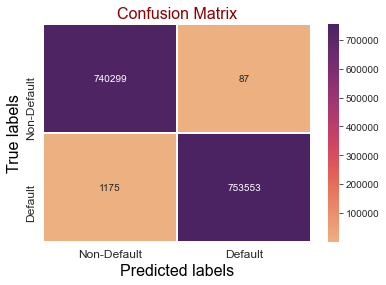

Confusion matrix values
 [[740299     87]
 [  1175 753553]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999    740386
           1      1.000     0.998     0.999    754728

    accuracy                          0.999   1495114
   macro avg      0.999     0.999     0.999   1495114
weighted avg      0.999     0.999     0.999   1495114



ROC_AUC score : 99.916%


In [48]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_adasyn_cat=metrics.confusion_matrix(y_resampled_adasyn,y_pred_train_adasyn_cat)

ax= plt.subplot()
sns.heatmap(cm_train_adasyn_cat, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_adasyn_cat)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(y_resampled_adasyn,y_pred_train_adasyn_cat,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(y_resampled_adasyn,y_pred_train_adasyn_cat)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Evaluating the test dataset

In [49]:
y_pred_test_adasyn_cat=cat_clf_adasyn.predict(individual_X_test)

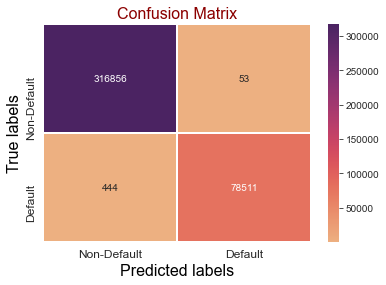

Confusion matrix values
 [[316856     53]
 [   444  78511]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     0.999    316909
           1      0.999     0.994     0.997     78955

    accuracy                          0.999    395864
   macro avg      0.999     0.997     0.998    395864
weighted avg      0.999     0.999     0.999    395864



ROC_AUC score : 99.71%


In [50]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_adasyn_cat=metrics.confusion_matrix(individual_y_test,y_pred_test_adasyn_cat)

ax= plt.subplot()
sns.heatmap(cm_test_adasyn_cat, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_adasyn_cat)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_test,y_pred_test_adasyn_cat,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_test,y_pred_test_adasyn_cat)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Explainability of the result

In [56]:
# compiling the test dataset
start_time = timer(None) # start time

xpl_cat = SmartExplainer()
xpl_cat.compile(
    x=individual_X_test,
    model=cat_clf_adasyn,
   
)

timer(start_time)   # end time

Backend: Shap TreeExplainer

 Time taken: 0 hours 0 minutes and 59.85 seconds.


In [57]:
y_test_pred_adasyn_cat=pd.Series(y_pred_test_adasyn_cat)
y_test_pred_adasyn_cat.index=individual_y_test.index
y_test_pred_adasyn_cat.head()

344869     0
1300957    0
1217813    0
467206     1
865505     0
dtype: int64

In [58]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_cat = xpl_cat.to_smartpredictor()
predictor_cat.add_input(x=individual_X_test, ypred=y_test_pred_adasyn_cat)
detailed_contributions_cat = predictor_cat.detail_contributions()

timer(start_time)   # end time


 Time taken: 0 hours 1 minutes and 49.45 seconds.


In [59]:
# top 5 rows of feature contribution of the predicted result
detailed_contributions_cat.head()

,ypred,proba,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range
344869,0,0.999763,-5.215413,-0.028188,0.021065,-0.838044,-0.08331,0.057313,-0.015968,0.048601,-0.061833,-0.051638,-0.056701,-0.134815,-0.054516,0.063964,0.068201,-0.007725,0.000016,0.000278,0.061496,-0.004052,0.019373,-0.019338,0.001658,-0.0,-0.283603,0.140183,15.168441,0.035591,-0.122316,3.702165,0.000464,0.017487,-0.00017,-0.000056,0.003558,-0.000231,-0.080434,-0.0,-0.153019,-0.001668,-0.0,0.036717,-0.0,0.031499,0.20187,0.03356,-0.0,0.001188,-0.030741,-0.004957,-0.0,-0.000001,-0.0,-0.012216,0.078534,-0.012493,-0.061783,-0.000585,-0.0,-0.019524,-0.000018,-0.0,0.108981,-0.004298,3.333602
1300957,0,0.999872,-3.932921,0.105702,-0.011936,-1.116186,0.223419,-0.000751,-0.175262,-0.070169,-0.061826,-0.037004,0.129571,-0.055522,0.010872,-0.009477,-0.009488,0.063339,-0.000027,0.000282,0.069589,-0.002354,-0.007853,-0.01935,-0.017019,-0.0,-0.185775,0.137105,14.540421,-0.124675,-0.004534,3.799996,-0.021829,-0.019158,0.000131,0.001256,0.000482,-0.000176,0.055131,-0.0,0.092831,-0.000623,-0.0,0.095609,-0.0,-0.053149,0.107614,0.052226,-0.0,0.005421,-0.010819,0.000391,-0.0,-0.000001,-0.0,-0.012216,0.112204,-0.01431,0.156478,-0.000796,-0.0,0.007618,-0.000018,-0.0,0.10561,-0.020014,2.616742
1217813,0,0.999972,3.638214,-0.016518,0.041102,0.702459,-0.091557,0.003458,0.076654,0.048118,-0.061262,0.003662,-0.04621,0.013411,0.01098,-0.002244,-0.009511,0.051247,-0.00002,0.000282,0.146761,0.001979,-0.012641,-0.011069,-0.020273,-0.0,0.017305,0.068455,4.485561,0.067902,-0.047466,4.17525,0.263791,-0.018416,-0.000052,-0.000007,0.002766,0.000513,-0.118851,-0.0,0.088297,-0.00446,-0.0,0.141814,-0.0,0.005247,0.221296,0.038081,-0.0,0.015787,0.252637,-0.003486,-0.0,0.000007,-0.0,-0.024716,0.135664,-0.013322,-0.068186,-0.001303,-0.0,-0.019422,-0.000018,-0.0,0.129208,-0.004027,3.741937
467206,1,1.000000,-3.598417,0.008925,0.009658,-0.579666,0.072992,-0.000916,-0.024413,-0.022703,-0.071239,-0.002968,-0.072949,0.056114,-0.010133,0.011481,0.008276,0.010233,-0.000015,-0.000258,-0.559398,0.001113,-0.011315,0.017216,-0.058713,0.0,0.1634,0.420897,11.297227,0.014432,0.009198,2.042254,-0.028073,-0.009278,-0.000697,0.00002,-0.022002,0.000093,0.068941,0.0,-0.035817,0.027957,0.0,-0.250232,0.0,-0.002383,-0.394281,-0.091621,0.0,-0.035832,-0.060955,0.002536,0.0,0.000003,0.0,0.012458,-0.197755,0.011573,0.059666,0.000879,0.0,-0.008452,0.000083,0.0,-0.157615,-0.092803,3.097399
865505,0,0.999569,-0.735104,-0.013933,0.020734,-0.69977,-0.081703,0.003497,0.031292,0.037212,0.098571,0.004136,-0.037346,0.156966,0.013736,-0.005816,-0.009177,-0.008598,0.000006,0.000278,0.251833,-0.001921,-0.03129,-0.019358,-0.015241,-0.0,-0.021185,0.11977,13.065453,0.057479,0.258798,-2.096515,0.277023,-0.017524,-0.000259,-0.000056,0.001663,-0.000173,-0.105208,-0.0,0.096751,-0.001989,-0.0,0.113143,-0.0,-0.026711,0.245963,0.045707,-0.0,0.015839,-0.001534,-0.000931,-0.0,-0.000001,-0.0,-0.012216,0.132084,-0.013456,-0.068186,-0.00103,-0.0,0.008876,-0.000018,-0.0,0.144392,-0.003859,4.105696


In [60]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_cat.modify_mask(max_contrib=5)
explanation_cat = predictor_cat.summarize()

timer(start_time)   # end time


 Time taken: 0 hours 1 minutes and 14.31 seconds.


In [61]:
# top 5 rows of the predicted result with top 5 feature contribution
explanation_cat.head()

,ypred,proba,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3,feature_4,value_4,contribution_4,feature_5,value_5,contribution_5
344869,0,0.999763,total_rec_prncp,1.815778,15.168441,loan_amnt,1.592859,-5.215413,last_pymnt_amnt,0.026586,3.702165,avg_last_fico_range,1.699223,3.333602,installment,1.780528,-0.838044
1300957,0,0.999872,total_rec_prncp,1.472794,14.540421,loan_amnt,1.243703,-3.932921,last_pymnt_amnt,2.387942,3.799996,avg_last_fico_range,0.209452,2.616742,installment,1.552001,-1.116186
1217813,0,0.999972,total_rec_prncp,-0.356458,4.485561,last_pymnt_amnt,-0.153981,4.17525,avg_last_fico_range,1.699223,3.741937,loan_amnt,-0.618464,3.638214,installment,-0.61382,0.702459
467206,1,1.000000,total_rec_prncp,-1.076229,11.297227,loan_amnt,-0.73485,-3.598417,avg_last_fico_range,-2.180388,3.097399,last_pymnt_amnt,-0.74218,2.042254,installment,-0.634767,-0.579666
865505,0,0.999569,total_rec_prncp,0.329511,13.065453,avg_last_fico_range,1.32678,4.105696,last_pymnt_amnt,-0.758816,-2.096515,loan_amnt,0.079848,-0.735104,installment,0.153129,-0.69977


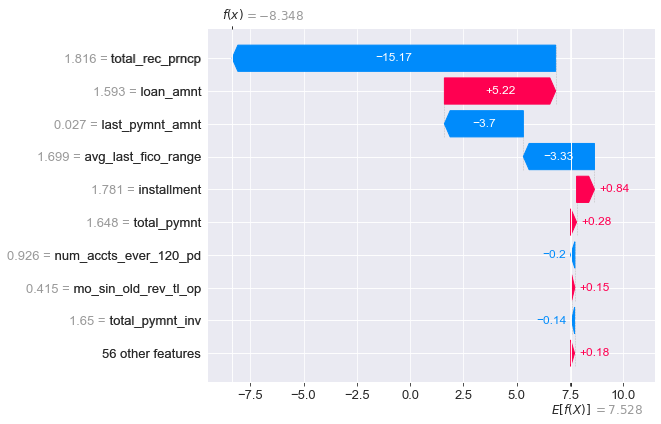


 Time taken: 0 hours 0 minutes and 42.62 seconds.


In [62]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explanation_cat = shap.Explainer(cat_clf_adasyn)
shap_values_cat = explanation_cat(individual_X_test)
shap.plots.waterfall(shap_values_cat[0])

timer(start_time)   # end time

In [63]:
# plotting the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values_cat[0])

### Stacking Model

#### Model Learning

In [51]:
# initializing the classifier
clf1 = XGBClassifier(random_state=100)
clf2 = LGBMClassifier(random_state=100)
clf3 = CatBoostClassifier(random_state=100)
lr = LogisticRegression(random_state=100)

sclf_adasyn = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)
start_time = timer(None) # timing starts from this point for "start_time" variable
sclf_adasyn.fit(X_resampled_adasyn,y_resampled_adasyn)
timer(start_time)

[00:39:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.233625
0:	learn: 0.2620835	total: 393ms	remaining: 6m 32s
1:	learn: 0.1515944	total: 728ms	remaining: 6m 3s
2:	learn: 0.1017572	total: 1.05s	remaining: 5m 50s
3:	learn: 0.0751199	total: 1.34s	remaining: 5m 34s
4:	learn: 0.0624176	total: 1.65s	remaining: 5m 28s
5:	learn: 0.0553702	total: 1.91s	remaining: 5m 16s
6:	learn: 0.0494534	total: 2.19s	remaining: 5m 11s
7:	learn: 0.0430326	total: 2.51s	remaining: 5m 11s
8:	learn: 0.0382972	total: 2.8s	remaining: 5m 8s
9:	learn: 0.0363874	total: 3.06s	remaining: 5m 3s
10:	learn: 0.0339275	total: 3.39s	remaining: 5m 4s
11:	learn: 0.0304566	total: 3.72s	remaining: 5m 6s
12:	learn: 0.0283109	total: 4.01s	remaining: 5m 4s
1

152:	learn: 0.0038298	total: 42.6s	remaining: 3m 56s
153:	learn: 0.0038297	total: 42.8s	remaining: 3m 55s
154:	learn: 0.0038297	total: 43.1s	remaining: 3m 54s
155:	learn: 0.0038297	total: 43.3s	remaining: 3m 54s
156:	learn: 0.0038297	total: 43.5s	remaining: 3m 53s
157:	learn: 0.0038297	total: 43.7s	remaining: 3m 53s
158:	learn: 0.0038297	total: 44s	remaining: 3m 52s
159:	learn: 0.0038297	total: 44.2s	remaining: 3m 51s
160:	learn: 0.0038297	total: 44.4s	remaining: 3m 51s
161:	learn: 0.0038297	total: 44.6s	remaining: 3m 50s
162:	learn: 0.0038296	total: 44.8s	remaining: 3m 50s
163:	learn: 0.0038296	total: 45s	remaining: 3m 49s
164:	learn: 0.0038296	total: 45.2s	remaining: 3m 48s
165:	learn: 0.0038296	total: 45.4s	remaining: 3m 48s
166:	learn: 0.0038295	total: 45.6s	remaining: 3m 47s
167:	learn: 0.0038295	total: 45.9s	remaining: 3m 47s
168:	learn: 0.0038295	total: 46.1s	remaining: 3m 46s
169:	learn: 0.0038295	total: 46.3s	remaining: 3m 46s
170:	learn: 0.0038294	total: 46.5s	remaining: 3m 4

308:	learn: 0.0036291	total: 1m 20s	remaining: 2m 58s
309:	learn: 0.0036291	total: 1m 20s	remaining: 2m 58s
310:	learn: 0.0036291	total: 1m 20s	remaining: 2m 58s
311:	learn: 0.0036291	total: 1m 20s	remaining: 2m 58s
312:	learn: 0.0036291	total: 1m 21s	remaining: 2m 57s
313:	learn: 0.0036291	total: 1m 21s	remaining: 2m 57s
314:	learn: 0.0036291	total: 1m 21s	remaining: 2m 57s
315:	learn: 0.0036291	total: 1m 21s	remaining: 2m 57s
316:	learn: 0.0036291	total: 1m 22s	remaining: 2m 56s
317:	learn: 0.0036291	total: 1m 22s	remaining: 2m 56s
318:	learn: 0.0036291	total: 1m 22s	remaining: 2m 56s
319:	learn: 0.0036291	total: 1m 22s	remaining: 2m 55s
320:	learn: 0.0036291	total: 1m 23s	remaining: 2m 55s
321:	learn: 0.0036291	total: 1m 23s	remaining: 2m 55s
322:	learn: 0.0036291	total: 1m 23s	remaining: 2m 55s
323:	learn: 0.0036291	total: 1m 23s	remaining: 2m 54s
324:	learn: 0.0036291	total: 1m 24s	remaining: 2m 54s
325:	learn: 0.0036291	total: 1m 24s	remaining: 2m 54s
326:	learn: 0.0036291	total:

460:	learn: 0.0036275	total: 1m 58s	remaining: 2m 17s
461:	learn: 0.0036274	total: 1m 58s	remaining: 2m 17s
462:	learn: 0.0036274	total: 1m 58s	remaining: 2m 17s
463:	learn: 0.0036274	total: 1m 58s	remaining: 2m 17s
464:	learn: 0.0036274	total: 1m 58s	remaining: 2m 16s
465:	learn: 0.0036274	total: 1m 59s	remaining: 2m 16s
466:	learn: 0.0036274	total: 1m 59s	remaining: 2m 16s
467:	learn: 0.0036273	total: 1m 59s	remaining: 2m 16s
468:	learn: 0.0036273	total: 1m 59s	remaining: 2m 15s
469:	learn: 0.0036273	total: 2m	remaining: 2m 15s
470:	learn: 0.0036273	total: 2m	remaining: 2m 15s
471:	learn: 0.0036273	total: 2m	remaining: 2m 14s
472:	learn: 0.0036273	total: 2m	remaining: 2m 14s
473:	learn: 0.0036273	total: 2m 1s	remaining: 2m 14s
474:	learn: 0.0036272	total: 2m 1s	remaining: 2m 14s
475:	learn: 0.0036272	total: 2m 1s	remaining: 2m 13s
476:	learn: 0.0036272	total: 2m 1s	remaining: 2m 13s
477:	learn: 0.0036272	total: 2m 2s	remaining: 2m 13s
478:	learn: 0.0036271	total: 2m 2s	remaining: 2m 

614:	learn: 0.0035162	total: 2m 32s	remaining: 1m 35s
615:	learn: 0.0035162	total: 2m 32s	remaining: 1m 35s
616:	learn: 0.0035162	total: 2m 32s	remaining: 1m 34s
617:	learn: 0.0035162	total: 2m 32s	remaining: 1m 34s
618:	learn: 0.0035162	total: 2m 33s	remaining: 1m 34s
619:	learn: 0.0035162	total: 2m 33s	remaining: 1m 33s
620:	learn: 0.0035161	total: 2m 33s	remaining: 1m 33s
621:	learn: 0.0035161	total: 2m 33s	remaining: 1m 33s
622:	learn: 0.0035161	total: 2m 33s	remaining: 1m 33s
623:	learn: 0.0035161	total: 2m 34s	remaining: 1m 32s
624:	learn: 0.0035161	total: 2m 34s	remaining: 1m 32s
625:	learn: 0.0035161	total: 2m 34s	remaining: 1m 32s
626:	learn: 0.0035161	total: 2m 34s	remaining: 1m 32s
627:	learn: 0.0035161	total: 2m 35s	remaining: 1m 31s
628:	learn: 0.0035160	total: 2m 35s	remaining: 1m 31s
629:	learn: 0.0035160	total: 2m 35s	remaining: 1m 31s
630:	learn: 0.0035160	total: 2m 35s	remaining: 1m 31s
631:	learn: 0.0035160	total: 2m 35s	remaining: 1m 30s
632:	learn: 0.0035160	total:

768:	learn: 0.0033484	total: 3m 8s	remaining: 56.5s
769:	learn: 0.0033484	total: 3m 8s	remaining: 56.3s
770:	learn: 0.0033484	total: 3m 8s	remaining: 56s
771:	learn: 0.0033484	total: 3m 8s	remaining: 55.8s
772:	learn: 0.0033484	total: 3m 9s	remaining: 55.5s
773:	learn: 0.0033484	total: 3m 9s	remaining: 55.3s
774:	learn: 0.0033484	total: 3m 9s	remaining: 55.1s
775:	learn: 0.0033484	total: 3m 9s	remaining: 54.8s
776:	learn: 0.0033483	total: 3m 10s	remaining: 54.6s
777:	learn: 0.0033483	total: 3m 10s	remaining: 54.3s
778:	learn: 0.0033483	total: 3m 10s	remaining: 54.1s
779:	learn: 0.0033483	total: 3m 10s	remaining: 53.8s
780:	learn: 0.0033483	total: 3m 11s	remaining: 53.6s
781:	learn: 0.0033483	total: 3m 11s	remaining: 53.4s
782:	learn: 0.0033483	total: 3m 11s	remaining: 53.1s
783:	learn: 0.0033483	total: 3m 11s	remaining: 52.9s
784:	learn: 0.0033483	total: 3m 12s	remaining: 52.6s
785:	learn: 0.0033483	total: 3m 12s	remaining: 52.4s
786:	learn: 0.0033483	total: 3m 12s	remaining: 52.2s
787

924:	learn: 0.0033478	total: 3m 48s	remaining: 18.6s
925:	learn: 0.0033478	total: 3m 49s	remaining: 18.3s
926:	learn: 0.0033478	total: 3m 49s	remaining: 18.1s
927:	learn: 0.0033478	total: 3m 49s	remaining: 17.8s
928:	learn: 0.0033478	total: 3m 49s	remaining: 17.6s
929:	learn: 0.0033478	total: 3m 50s	remaining: 17.3s
930:	learn: 0.0033478	total: 3m 50s	remaining: 17.1s
931:	learn: 0.0033478	total: 3m 50s	remaining: 16.8s
932:	learn: 0.0033478	total: 3m 50s	remaining: 16.6s
933:	learn: 0.0033478	total: 3m 51s	remaining: 16.3s
934:	learn: 0.0033478	total: 3m 51s	remaining: 16.1s
935:	learn: 0.0033478	total: 3m 51s	remaining: 15.8s
936:	learn: 0.0033478	total: 3m 51s	remaining: 15.6s
937:	learn: 0.0033478	total: 3m 52s	remaining: 15.3s
938:	learn: 0.0033478	total: 3m 52s	remaining: 15.1s
939:	learn: 0.0033478	total: 3m 52s	remaining: 14.9s
940:	learn: 0.0033478	total: 3m 52s	remaining: 14.6s
941:	learn: 0.0033478	total: 3m 53s	remaining: 14.4s
942:	learn: 0.0033478	total: 3m 53s	remaining:

In [52]:
# prediction for resampled train dataset
y_pred_train_adasyn_stack=sclf_adasyn.predict(X_resampled_adasyn)

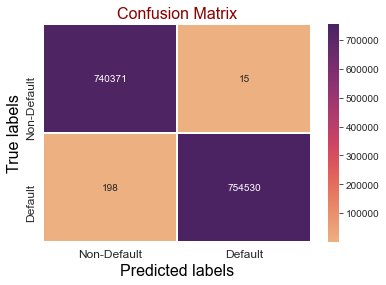

Confusion matrix values
 [[740371     15]
 [   198 754530]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000    740386
           1      1.000     1.000     1.000    754728

    accuracy                          1.000   1495114
   macro avg      1.000     1.000     1.000   1495114
weighted avg      1.000     1.000     1.000   1495114



ROC_AUC score : 99.986%


In [53]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_adasyn_stack=metrics.confusion_matrix(y_resampled_adasyn,y_pred_train_adasyn_stack)

ax= plt.subplot()
sns.heatmap(cm_train_adasyn_stack, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_adasyn_stack)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(y_resampled_adasyn,y_pred_train_adasyn_stack,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(y_resampled_adasyn,y_pred_train_adasyn_stack)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Evaluating the test dataset

In [54]:
# prediction for test dataset 
y_pred_test_adasyn_stack=sclf_adasyn.predict(individual_X_test)

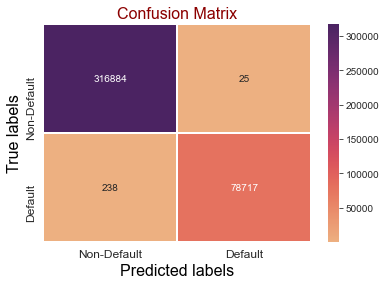

Confusion matrix values
 [[316884     25]
 [   238  78717]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     1.000    316909
           1      1.000     0.997     0.998     78955

    accuracy                          0.999    395864
   macro avg      0.999     0.998     0.999    395864
weighted avg      0.999     0.999     0.999    395864



ROC_AUC score : 99.845%


In [55]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_adasyn_stack=metrics.confusion_matrix(individual_y_test,y_pred_test_adasyn_stack)

ax= plt.subplot()
sns.heatmap(cm_test_adasyn_stack, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_adasyn_stack)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_test,y_pred_test_adasyn_stack,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_test,y_pred_test_adasyn_stack)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

# Joint Dataset

## Preprocessing

In [93]:
# reading the dataset
joint_df=pd.read_csv('joint_app_df.csv').iloc[:,1:]
joint_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,annual_inc_joint,dti_joint,verification_status_joint,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,disbursement_method,debt_settlement_flag,target,avg_fico_range,avg_last_fico_range
0,20000.0,1,10.78,432.66,1,8,10792,1,0,63000.00,0,122015,3,3,60,13,10.78,82000,0.0,6.0,7869.0,56.2,18.0,1,22705.924294,22705.92,20000.00,2705.9200,62017,15813.30,32019,71000.00,13.85,0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,60.0,10.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,100.0,50.0,218418.0,18696.0,6200.0,14877.0,31551.0,82006,1.0,2.0,11.0,57.0,3.0,13.0,0,0,0,697.0,668.0
1,15000.0,0,11.99,498.15,2,10,4761,0,0,65000.00,1,122015,2,3,91,4,17.56,82004,0.0,9.0,13028.0,88.3,16.0,1,15183.460000,15183.46,15000.00,183.4600,22016,15208.44,22016,77000.00,15.40,0,231860.0,0.0,0.0,0.0,0.0,30.0,22525.0,74.0,0.0,2.0,2839.0,78.0,14800.0,3.0,1.0,2.0,2.0,25762.0,295.0,94.2,99.0,136.0,13.0,13.0,1.0,28.0,11.0,2.0,7.0,2.0,3.0,4.0,7.0,11.0,7.0,9.0,0.0,92.3,100.0,251645.0,35553.0,5100.0,30649.0,31551.0,82006,1.0,2.0,11.0,57.0,3.0,13.0,0,0,0,667.0,668.0
2,24000.0,1,23.13,678.37,5,26,2016,6,0,43435.00,2,122015,2,3,77,42,35.70,71998,0.0,13.0,12508.0,73.1,22.0,1,27488.251245,27488.25,24000.00,3488.2500,92016,417.35,72018,113314.00,25.44,0,182215.0,0.0,6.0,2.0,5.0,10.0,48582.0,75.0,0.0,1.0,5690.0,74.0,17100.0,1.0,2.0,1.0,6.0,14017.0,357.0,96.8,52.0,209.0,13.0,10.0,1.0,26.0,12.0,2.0,5.0,2.0,4.0,9.0,6.0,12.0,5.0,13.0,2.0,100.0,100.0,208064.0,61090.0,11000.0,61739.0,31551.0,82006,1.0,2.0,11.0,57.0,3.0,13.0,0,0,0,682.0,668.0
3,24000.0,1,13.44,551.50,2,12,9257,0,0,96000.00,2,122015,1,3,64,23,22.70,62001,1.0,13.0,19403.0,53.3,24.0,1,30785.080592,30785.08,24000.00,6363.4475,82018,14284.88,82018,117000.00,22.76,0,220879.0,0.0,4.0,1.0,3.0,10.0,43145.0,70.0,1.0,3.0,6210.0,64.0,36400.0,2.0,0.0,5.0,7.0,16991.0,6328.0,60.9,158.0,71.0,11.0,10.0,2.0,19.0,6.0,2.0,5.0,3.0,4.0,8.0,8.0,13.0,5.0,13.0,2.0,95.7,66.7,258301.0,62548.0,16200.0,61251.0,31551.0,82006,1.0,2.0,11.0,57.0,3.0,13.0,0,0,0,677.0,668.0
4,8750.0,0,18.99,320.70,4,20,5881,0,3,29524.32,2,122015,2,3,60,13,46.71,81998,0.0,9.0,2412.0,96.5,12.0,1,7575.680000,7575.68,4497.71,2153.9000,92017,320.70,12018,94348.32,17.07,0,94802.0,2.0,6.0,2.0,3.0,3.0,92313.0,89.0,0.0,1.0,1458.0,89.0,2500.0,4.0,0.0,6.0,5.0,10534.0,88.0,96.5,208.0,54.0,14.0,3.0,0.0,14.0,3.0,2.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,3.0,100.0,100.0,101994.0,94802.0,2500.0,99417.0,31551.0,82006,1.0,2.0,11.0,57.0,3.0,13.0,0,0,1,682.0,668.0


In [94]:
# checking the shape of the dataset
joint_df.shape

(25806, 90)

In [95]:
# splitting the target feature
X_joint=joint_df.drop('target',axis=1)
y_joint=joint_df['target']

In [96]:
# splitting into the train and test dataset


joint_X_train, joint_X_test, joint_y_train, joint_y_test = train_test_split(X_joint, y_joint, test_size=0.3,random_state=100)


In [97]:
# categorical variable
cat_var_joint=pd.Index(['term', 'grade', 'sub_grade','emp_title', 'emp_length','home_ownership', 'verification_status','issue_d',
               'purpose','title','addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','last_credit_pull_d',
               'verification_status_joint','sec_app_earliest_cr_line','disbursement_method','debt_settlement_flag'])

In [98]:
# creating a list of columns for numerical features only
numerical_cols=joint_X_train.columns
len(numerical_cols)

89

In [99]:
numerical_cols=numerical_cols.drop(cat_var_joint)
len(numerical_cols)

70

In [100]:
scaler = StandardScaler()

# scaling the train dataset
joint_X_train[numerical_cols]=scaler.fit_transform(joint_X_train[numerical_cols])
joint_X_train.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,annual_inc_joint,dti_joint,verification_status_joint,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range
23453,-1.366827,0,1.021190,-1.232259,3,18,10411,10,0,0.217815,0,102017,8,10,-0.039667,47,-0.032143,101984,-0.674973,-0.802954,-0.756026,1.200109,-0.130360,1,-0.964614,-0.964410,-0.882115,-0.680767,82018,-0.608063,102017,0.642976,1.454853,0,-0.242856,0.214433,-0.249839,-0.882521,-1.127961,1.650624,-0.685386,-1.156927,-0.123683,0.227683,0.048625,-0.093468,-1.121290,-0.826476,0.103082,-0.579132,-0.209645,0.420313,-0.981228,1.686820,0.976831,2.197825,-0.228385,-0.561692,0.067963,1.184275,0.075316,-1.094507,-0.685416,-1.283737,-0.666973,-0.386829,-0.860145,0.197414,-0.671817,-0.798572,-0.048925,0.015422,1.568918,-0.355860,-0.838578,-0.928479,-0.485394,1.824077,72007,-1.079269,2.366308,0.697799,0.273314,0.228888,0.674492,0,0,-0.374130,0.456715
22576,-0.397440,0,0.841296,-0.059205,3,17,759,10,3,-0.532009,2,102017,5,7,-1.511168,33,-0.411410,32001,2.303581,-1.000703,-0.987488,-0.204669,0.144031,1,-0.854301,-0.854058,-1.025939,0.062886,82018,-0.947176,22019,-1.210419,-0.108410,0,-0.636605,1.470029,-0.249839,1.758827,1.639037,-1.065051,1.422151,1.556913,0.719413,0.227683,-1.321918,1.256334,-1.116445,0.601839,-0.341326,0.447506,0.818880,-0.237572,0.234059,-0.011581,1.630003,-0.257825,-0.684689,-0.740417,-1.048111,0.261428,-0.312791,-1.632586,-0.685416,-1.712909,-1.457329,1.403340,-0.860145,-0.677520,-0.671817,-0.996392,1.173467,0.740999,-0.003786,-0.787798,0.790958,-1.246231,0.835496,-0.164908,42014,0.400609,-1.230847,-1.312610,-0.496219,-1.653915,-1.160202,0,0,-0.098703,-0.698374
7379,-1.706112,0,0.481508,-1.601311,3,15,4020,0,3,-0.361594,1,72017,7,9,-0.909190,26,-1.267243,32000,-0.674973,-1.000703,-1.150468,-1.714223,-1.502314,0,-1.295739,-1.295649,-1.188018,-0.971362,122018,-0.963250,122018,-0.652167,-1.001892,1,-1.085631,1.470029,-0.817953,0.438153,-0.436211,-0.909870,-0.693223,1.279990,-0.123683,-0.248564,-1.147653,-1.057613,-0.074890,-0.826476,-0.785734,-1.092451,-0.552487,-0.987803,1.464952,-1.686671,-2.158393,0.339191,-1.140994,-1.276593,-1.048111,-1.095701,0.075316,-0.018349,-0.685416,0.003778,-0.403520,-1.200542,-0.614936,-0.969165,-0.671817,-0.996392,-0.048925,0.740999,-1.142640,-1.048394,-0.957327,0.253559,-0.853421,-1.480018,82009,-1.079269,-1.230847,-0.419095,2.024830,2.111691,-1.343672,0,0,1.553857,-1.935969
18536,1.056640,0,-0.186139,1.447489,2,11,5000,10,0,-0.191180,1,12017,2,3,1.264617,4,0.045961,112001,-0.674973,1.570044,-0.773030,-1.124372,2.430621,1,0.253304,0.253929,-0.139955,1.553846,82018,-0.902970,12019,-0.272556,0.113973,0,0.219157,1.470029,-0.817953,-0.882521,-0.436211,0.486763,-0.434526,0.116916,2.405605,2.608918,-0.721216,-0.479126,-0.142712,-0.826476,0.991897,-0.579132,2.533087,-0.338444,-0.826267,0.601175,-0.177106,0.057579,-0.867211,-0.740417,-0.490074,-0

In [101]:
# scaling the test dataset
joint_X_test[numerical_cols]=scaler.transform(joint_X_test[numerical_cols])
joint_X_test.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,annual_inc_joint,dti_joint,verification_status_joint,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range
6721,-1.151138,0,0.661402,-0.988792,3,16,10549,4,3,-0.482111,1,72017,2,3,-1.812156,18,-0.392877,32004,0.814304,1.174545,-0.466582,0.020406,2.247694,1,-0.738817,-0.738534,-0.687649,-0.391834,102018,-0.512668,32019,-1.066077,-0.734769,1,-0.607854,1.470029,2.022616,1.758827,2.330787,-0.521916,1.376714,1.169221,2.405605,2.132671,-0.189964,0.967091,-0.607779,-0.112318,-0.785734,1.987462,2.533087,-0.804474,-0.546679,0.318108,0.650245,-0.190238,-0.775950,-0.561692,-1.048111,-0.932846,-0.700899,1.057809,0.838209,0.432949,0.123384,2.379795,0.365899,0.343236,0.733469,1.179625,2.395859,-0.831083,-1.142640,-0.715910,0.902900,-0.509046,0.864730,-1.341682,122007,1.880487,-1.230847,-1.535989,-0.590641,-1.026314,-1.343672,0,0,-1.062696,-0.368348
12582,0.571947,1,-0.278868,0.000792,2,11,7766,1,0,0.081483,2,32016,2,3,0.495423,17,0.086337,121996,-0.674973,0.383545,0.159043,0.788765,0.326958,1,1.136488,1.137419,0.865899,2.403174,82018,0.503974,102018,0.174045,-0.315003,0,0.042809,1.470029,1.454502,0.438153,0.255538,-0.909870,0.233272,-0.713851,-0.966778,-0.248564,0.702120,0.099361,-0.380090,-0.112318,1.436305,-0.579132,0.133197,-0.137859,-0.859677,1.230583,0.584928,0.609537,0.319181,-0.561692,0.067963,-0.281424,-0.312791,-0.018349,-0.304510,-0.425394,0.123384,0.101399,-0.124518,0.343236,-0.320495,0.388346,-0.048925,0.181700,1.568918,0.040568,0.161347,-0.197649,0.688424,0.194214,82006,0.400609,0.208015,0.027663,-0.019392,0.228888,0.124084,0,0,-0.374130,-0.005320
19905,2.026027,1,0.103175,1.237289,2,13,4938,2,3,-0.191180,1,122017,2,3,0.997071,3,-0.715883,82008,-0.674973,2.361043,-0.587377,-1.252432,0.509885,1,1.941104,1.942313,2.176909,-0.537202,22018,2.797010,122017,1.915789,0.315302,1,-0.984704,1.470029,0.886388,0.438153,0.947288,-1.142642,-0.404300,1.169221,2.405605,2.608918,0.519910,-0.720162,0.695376,-0.112318,0.103082,1.987462,2.533087,-1.080968,2.108918,-1.227104,-0.264195,-1.429328,-1.049733,-1.097868,-1.048111,-1.095701,-1.283060,-0.018349,-0.685416,2.149635,1.440644,-0.224086,2.572779,1.363993,-0.671817,2.366543,2.395859,0.227049,-0.871485,-0.888554,-0.564366,1.168685,-0.590529,1.824077,102004,0.400609,-0.511416,2.038072,-0.491498,2.111691,1.958778,0,0,0.314437,0.786741
13375,0.087254,1,-0.152757,-0.342960,2,12,7109,1,0,-0.600175,1,32016,2,3,-1.076406,44,0.477518,11989,-0.674973,-0.605204,0.215817,0.753840,-0.038896,1,0.678596,0.679369,0.428895,2.091195,102018,0.126667,102018,1.424528,-1.075581,0,0.555990,-1.041163,-0.817953,-0.882521,-0.436211,-0.211553,-0.098684,-0.049237,-0.966778,-0.248564,0.808216,0.436811,-0.321957,-0.826476,-0.341326,-1.092451,-0.552487,1.336687,-0.826377,1.107365,1.042148,1.668396,0.319181,1.225560,1.184036,-0.281424,1.239639,-0.018349,-0.304510,0.003778,-0.4035

## Resampling the train dataset

In [102]:
adasyn=ADASYN(sampling_strategy='minority',random_state=100,n_neighbors=4)

X_joint_adasyn, y_joint_adasyn = adasyn.fit_resample(joint_X_train, joint_y_train)

## Modeling 

### XGBoost Model

#### Model Learning

In [108]:
# initializing the classifier
xg_clf_joint_adasyn=XGBClassifier(random_state=100)

# fitting the model on resampled train dataset
xg_clf_joint_adasyn.fit(X_joint_adasyn,y_joint_adasyn)

[12:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
# prediction of resampled train dataset 
y_pred_train_joint_adasyn_xg=xg_clf_joint_adasyn.predict(X_joint_adasyn)

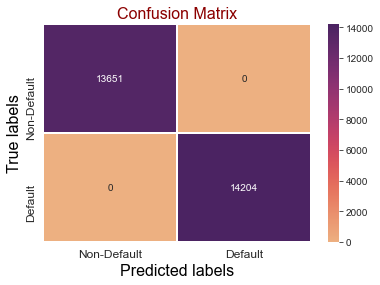

Confusion matrix values
 [[13651     0]
 [    0 14204]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     13651
           1      1.000     1.000     1.000     14204

    accuracy                          1.000     27855
   macro avg      1.000     1.000     1.000     27855
weighted avg      1.000     1.000     1.000     27855



ROC_AUC score : 100.0%


In [110]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_jnt_adasyn_xg=metrics.confusion_matrix(y_joint_adasyn,y_pred_train_joint_adasyn_xg)

ax= plt.subplot()
sns.heatmap(cm_train_jnt_adasyn_xg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_jnt_adasyn_xg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(y_joint_adasyn,y_pred_train_joint_adasyn_xg,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(y_joint_adasyn,y_pred_train_joint_adasyn_xg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

#### Evaluating the test dataset

In [111]:
# prediction for test dataset
y_test_pred_joint_adasyn_xg=xg_clf_joint_adasyn.predict(joint_X_test)

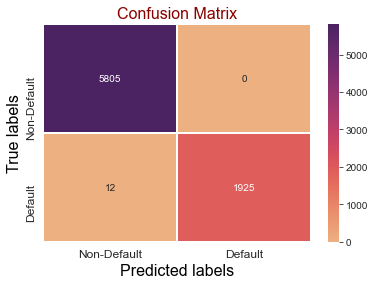

Confusion matrix values
 [[5805    0]
 [  12 1925]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999      5805
           1      1.000     0.994     0.997      1937

    accuracy                          0.998      7742
   macro avg      0.999     0.997     0.998      7742
weighted avg      0.998     0.998     0.998      7742



ROC_AUC score : 99.69%


In [112]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_jnt_test_adasyn=metrics.confusion_matrix(joint_y_test,y_test_pred_joint_adasyn_xg)

ax= plt.subplot()
sns.heatmap(cm_jnt_test_adasyn, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_jnt_test_adasyn)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_test_pred_joint_adasyn_xg,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(joint_y_test,y_test_pred_joint_adasyn_xg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

#### Explainability of the result

In [119]:
# compiling the test dataset
start_time = timer(None) # start time

xpl_jnt_xg = SmartExplainer()
xpl_jnt_xg.compile(
    x=joint_X_test,
    model=xg_clf_joint_adasyn,
   
)

timer(start_time)   # end time

Backend: Shap TreeExplainer

 Time taken: 0 hours 0 minutes and 0.69 seconds.


In [120]:
# reassigning the index to test prediction result 
y_test_pred_jnt_adasyn_xg=pd.Series(y_test_pred_joint_adasyn_xg)
y_test_pred_jnt_adasyn_xg.index=joint_y_test.index
y_test_pred_jnt_adasyn_xg.head()

6721     0
12582    0
19905    0
13375    0
1284     0
dtype: int64

In [121]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_jnt_xg = xpl_jnt_xg.to_smartpredictor()
predictor_jnt_xg.add_input(x=joint_X_test, ypred=y_test_pred_jnt_adasyn_xg)
detailed_contributions_jnt_xg = predictor_jnt_xg.detail_contributions()

timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 1.71 seconds.


In [122]:
# top 5 rows of feature contribution of the predicted result
detailed_contributions_jnt_xg.head()

,ypred,proba,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,annual_inc_joint,dti_joint,verification_status_joint,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range
6721,0,0.999703,2.483868,-0.0,0.027691,0.54403,0.000502,0.083948,-0.012187,0.01447,-0.01637,0.015498,-0.000667,0.022957,-0.0,0.006495,-0.123404,0.008659,0.066148,-0.25336,-0.038731,0.000322,-0.008638,-0.059845,-0.012372,0.001188,0.42045,-0.0,0.960534,0.303023,-0.158601,4.271373,-0.29057,-0.008312,-0.000631,-0.0,0.027039,-0.189859,0.133012,-0.073394,-0.065298,0.243823,0.091649,-0.063509,0.324276,0.262008,-0.143616,-0.024316,0.006424,-0.150243,0.008614,-0.016406,0.033679,-0.004532,-0.06947,-0.048633,0.010002,0.191558,0.040679,-0.025842,0.075197,0.008607,0.033211,-0.012681,-0.063456,-0.030237,-0.049412,-0.031699,0.013625,0.074621,-0.021955,-0.02884,-0.216997,-0.048404,-0.0,0.016798,0.031822,0.005344,0.018485,-0.036576,-0.03835,-0.192137,-0.013428,-0.017928,-0.037284,-0.0,-0.0,-0.0,0.002026,-0.0,0.017957
12582,0,0.999966,-0.899183,-0.0,0.001518,0.132809,-0.000359,-0.014817,0.009883,-0.003125,0.020471,-0.02435,0.064065,0.096306,-0.0,0.004595,0.094214,0.077869,-0.042261,0.400387,0.037115,0.000322,-0.023063,0.045255,0.009188,0.001188,0.038702,-0.0,6.77059,-0.638467,-0.185339,3.701031,0.720091,0.039553,0.024301,-0.0,-0.006216,-0.198176,0.10883,-0.042176,-0.049249,0.151303,0.03811,0.089064,-0.03005,0.003971,0.045428,-0.024101,-0.106792,-0.080186,-0.042578,-0.01502,0.030262,-0.00459,0.201889,-0.001067,0.014151,-0.421354,-0.040372,-0.028187,-0.035492,0.036368,-0.018918,0.043458,0.204992,0.038181,-0.012777,-0.00708,-0.03414,0.047301,0.055111,-0.007697,0.058512,-0.014023,-0.0,0.008841,0.098341,0.005344,0.012538,-0.022121,-0.026414,-0.183043,0.002033,-0.005366,-0.01247,-0.0,-0.0,-0.0,0.007677,-0.0,0.071316
19905,0,0.999964,-1.713263,-0.0,0.006527,-0.890401,-0.00025,0.019326,0.05825,0.002205,-0.01637,-0.056143,-0.002797,-0.201307,-0.0,0.005495,-0.03058,-0.03285,-0.001613,0.333457,0.031447,-0.005842,-0.054167,0.051892,0.059343,0.001188,0.057407,-0.0,6.924797,0.27738,0.014004,3.749744,0.308235,-0.004236,0.027631,-0.0,0.022897,-0.100384,0.046543,0.00731,-0.049249,0.246114,0.050112,-0.10512,0.10126,0.091025,0.000638,0.016386,0.06548,-0.110015,-0.005631,-0.012896,0.092944,-0.048865,-0.033281,0.053086,-0.03285,0.091935,0.271222,0.062515,0.066382,0.154096,0.078738,0.043564,0.092242,-0.01083,-0.007842,0.008946,-0.001584,-0.019167,0.026454,-0.02884,-0.075601,-0.01169,-0.0,0.016798,0.082767,-0.00525,0.013815,0.152181,0.013389,-0.073326,0.00839,0.080386,-0.005682,-0.0,-0.0,-0.0,0.007239,-0.0,0.065243
13375,0,0.999965,-0.331762,-0.0,-0.002969,0.504722,-0.000359,-0.025354,0.0034,-0.011757,0.009102,0.038999,-0.038381,0.129671,-0.0,0.02634,0.193066,0.050699,0.034214,-0.510163,0.039293,0.000322,-0.023063,0.066599,0.009188,0.001188,0.067711,-0.0,5.354264,-0.461941,-0.137429,3.903729,0.776674,0.

In [123]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_jnt_xg.modify_mask(max_contrib=5)
explanation_jnt_xg = predictor_jnt_xg.summarize()

timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 2.04 seconds.


In [124]:
# top 5 rows of the predicted result with top 5 feature contribution
explanation_jnt_xg.head()

,ypred,proba,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3,feature_4,value_4,contribution_4,feature_5,value_5,contribution_5
6721,0,0.999703,last_pymnt_amnt,-0.512668,4.271373,loan_amnt,-1.151138,2.483868,total_rec_prncp,-0.687649,0.960534,installment,-0.988792,0.54403,total_pymnt,-0.738817,0.42045
12582,0,0.999966,total_rec_prncp,0.865899,6.77059,last_pymnt_amnt,0.503974,3.701031,loan_amnt,0.571947,-0.899183,last_credit_pull_d,102018.0,0.720091,total_rec_int,2.403174,-0.638467
19905,0,0.999964,total_rec_prncp,2.176909,6.924797,last_pymnt_amnt,2.79701,3.749744,loan_amnt,2.026027,-1.713263,installment,1.237289,-0.890401,earliest_cr_line,82008.0,0.333457
13375,0,0.999965,total_rec_prncp,0.428895,5.354264,last_pymnt_amnt,0.126667,3.903729,last_credit_pull_d,102018.0,0.776674,earliest_cr_line,11989.0,-0.510163,installment,-0.34296,0.504722
1284,0,0.999991,last_pymnt_amnt,0.196311,4.357626,total_rec_prncp,-0.008108,3.177993,loan_amnt,-0.39744,1.138768,sec_app_inq_last_6mths,-1.079269,0.426931,total_rec_int,-0.482155,0.404811


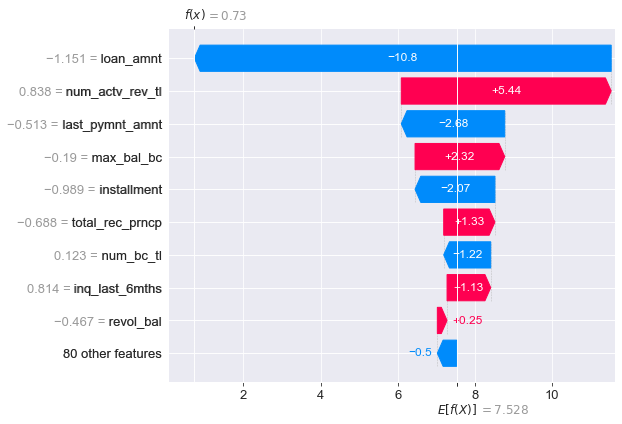


 Time taken: 0 hours 0 minutes and 2.69 seconds.


In [125]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explanation_jnt_xg = shap.Explainer(xg_clf_joint_adasyn)
shap_values_jnt_xg = explanation_cat(joint_X_test)
shap.plots.waterfall(shap_values_jnt_xg[0])

timer(start_time)   # end time

In [126]:
# plotting the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values_jnt_xg[0])

### LightGBM Model

#### Model Learning

In [103]:
# initializing the classifier
lgbm_clf_joint_adasyn=LGBMClassifier(random_state=100)

# fitting the model
lgbm_clf_joint_adasyn.fit(X_joint_adasyn,y_joint_adasyn)

LGBMClassifier(random_state=100)

In [114]:
# prediction for train dataset 
y_pred_train_jnt_adasyn_lg=lgbm_clf_joint_adasyn.predict(X_joint_adasyn)

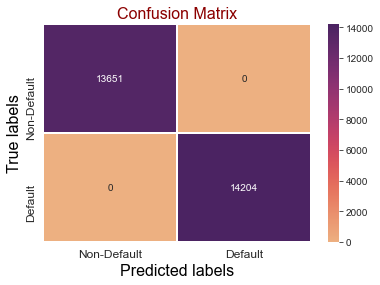

Confusion matrix values
 [[13651     0]
 [    0 14204]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     13651
           1      1.000     1.000     1.000     14204

    accuracy                          1.000     27855
   macro avg      1.000     1.000     1.000     27855
weighted avg      1.000     1.000     1.000     27855



ROC_AUC score : 100.0%


In [115]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_jnt_adasyn_lg=metrics.confusion_matrix(y_joint_adasyn,y_pred_train_jnt_adasyn_lg)

ax= plt.subplot()
sns.heatmap(cm_train_jnt_adasyn_lg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_jnt_adasyn_lg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(y_joint_adasyn,y_pred_train_jnt_adasyn_lg,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(y_joint_adasyn,y_pred_train_jnt_adasyn_lg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

#### Evaluating the test result

In [117]:
# prediction for test dataset
y_pred_test_jnt_adasyn_lg=lgbm_clf_joint_adasyn.predict(joint_X_test)

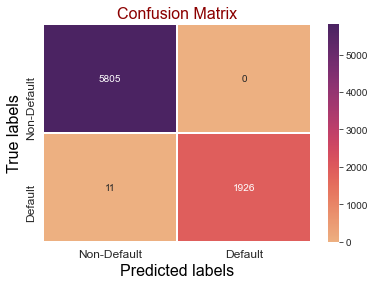

Confusion matrix values
 [[5805    0]
 [  11 1926]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999      5805
           1      1.000     0.994     0.997      1937

    accuracy                          0.999      7742
   macro avg      0.999     0.997     0.998      7742
weighted avg      0.999     0.999     0.999      7742



ROC_AUC score : 99.716%


In [118]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_jnt_test_adasyn_lg=metrics.confusion_matrix(joint_y_test,y_pred_test_jnt_adasyn_lg)

ax= plt.subplot()
sns.heatmap(cm_jnt_test_adasyn_lg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_jnt_test_adasyn_lg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_pred_test_jnt_adasyn_lg,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(joint_y_test,y_pred_test_jnt_adasyn_lg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

#### Explainability of the result

In [127]:
# compiling the test dataset
start_time = timer(None) # start time

xpl_jnt_lg = SmartExplainer()
xpl_jnt_lg.compile(
    x=joint_X_test,
    model=lgbm_clf_joint_adasyn,
   
)

timer(start_time)   # end time

Backend: Shap TreeExplainer

 Time taken: 0 hours 0 minutes and 1.69 seconds.


In [128]:
# reassigning the index to test prediction result 
y_test_pred_jnt_adasyn_lg=pd.Series(y_pred_test_jnt_adasyn_lg)
y_test_pred_jnt_adasyn_lg.index=joint_y_test.index
y_test_pred_jnt_adasyn_lg.head()

6721     0
12582    0
19905    0
13375    0
1284     0
dtype: int64

In [134]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_jnt_lg = xpl_jnt_lg.to_smartpredictor()
predictor_jnt_lg.add_input(x=joint_X_test, ypred=y_test_pred_jnt_adasyn_lg)
detailed_contributions_jnt_lg = predictor_jnt_lg.detail_contributions()

timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 3.41 seconds.


In [135]:
# top 5 rows of feature contribution of the predicted result
detailed_contributions_jnt_lg.head()

,ypred,proba,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,annual_inc_joint,dti_joint,verification_status_joint,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range
6721,0,0.999964,2.368174,-0.000152,0.000635,0.292864,0.005701,0.002665,-0.00023,0.000681,-0.005077,-0.056857,-0.000402,0.002542,0.001183,0.002754,0.033347,-0.000526,0.038964,-0.01254,0.000953,0.039438,0.002777,-0.002449,-0.028734,0.0,0.147973,-0.000534,2.727764,0.139831,-0.050595,4.911667,-0.032953,-0.003415,0.006087,0.000385,0.004575,-0.021055,0.084089,-0.002979,-0.021332,0.048518,-0.003548,-0.003741,-0.003887,0.087984,-0.015337,0.012359,0.005726,-0.006524,-0.001144,-0.010931,0.00276,0.005608,-0.000396,0.000384,0.002683,0.067185,0.000455,-0.009683,-0.010459,0.027675,0.00059,-0.002953,-0.001084,0.000181,0.000284,0.027217,-0.000354,0.002599,0.000193,-0.004872,-0.020775,-0.042794,-0.003118,-0.001343,0.044172,0.010189,-0.003591,0.000317,0.059448,-0.038327,0.000631,-0.004436,-0.00024,0.0,0.000428,0.0,0.010828,-0.00013,0.010972
12582,0,0.999945,-0.295614,0.004678,0.020835,0.033923,0.001373,0.019178,0.001995,-0.000189,0.001682,-0.018324,0.022653,0.007075,0.000444,0.002503,-0.001949,-0.001588,0.00943,0.023497,0.001258,0.004705,-0.009495,0.017652,-0.000061,0.0,0.008563,-0.00331,6.642025,-0.285834,0.012048,4.220734,0.132961,0.001625,0.001506,-0.002115,-0.002849,-0.01308,0.020246,0.006024,-0.014751,0.009704,0.000438,0.013045,0.004571,0.042385,-0.02493,0.019772,-0.052399,-0.010144,0.000126,-0.001333,0.007155,0.005879,-0.000603,0.000752,0.001603,-0.150105,-0.001793,-0.021373,0.00529,0.023583,-0.001048,0.000781,0.010439,0.000419,0.000259,0.004976,-0.003753,0.002968,0.000186,-0.00107,0.001574,-0.038163,0.01056,0.001861,0.031356,0.000312,-0.001032,0.000734,-0.054781,-0.048963,-0.000081,-0.000213,-0.001086,0.0,0.000416,0.0,0.019759,-0.000753,0.012737
19905,0,0.999960,-0.461903,0.000334,-0.000533,-0.106044,0.001436,0.01276,0.001452,0.001741,-0.005069,-0.021561,-0.000326,-0.056102,0.000028,0.003261,-0.015944,-0.002469,-0.082128,0.030617,-0.000516,-0.02145,0.023042,0.000095,-0.001515,0.0,0.040584,0.00067,6.936618,0.06149,0.024729,4.179473,0.019354,0.000737,0.003112,0.002879,0.010052,0.001714,0.02442,-0.008267,-0.019492,0.073127,-0.000048,-0.015001,-0.002004,0.085108,-0.052531,0.018177,0.000844,-0.009658,0.000011,-0.004969,0.006882,-0.006127,-0.001295,-0.000874,-0.00303,0.076429,0.006726,0.010639,-0.039049,0.012356,0.00128,-0.000211,0.00285,-0.001075,-0.000578,-0.000897,-0.016125,0.0011,0.000186,-0.037964,-0.034982,-0.025914,-0.000013,-0.000893,0.036369,-0.000729,0.000352,-0.005176,0.035633,-0.026417,0.001169,0.001203,-0.000161,0.0,0.000239,0.0,0.019831,0.001332,0.015658
13375,0,0.999949,-0.154879,0.029266,-0.00524,0.198359,0.000414,0.006045,0.001995,-0.000522,0.002227,0.08441,-0.000402,0.039214,0.000507,0.004417,0.032261,0.001446,0.047247,-0.095808,0.001454,0.002714,-0.004829,-0.00

In [136]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_jnt_lg.modify_mask(max_contrib=5)
explanation_jnt_lg = predictor_jnt_lg.summarize()

timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 2.09 seconds.


In [137]:
# top 5 rows of the predicted result with top 5 feature contribution
explanation_jnt_lg.head()

,ypred,proba,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3,feature_4,value_4,contribution_4,feature_5,value_5,contribution_5
6721,0,0.999964,last_pymnt_amnt,-0.512668,4.911667,total_rec_prncp,-0.687649,2.727764,loan_amnt,-1.151138,2.368174,installment,-0.988792,0.292864,total_pymnt,-0.738817,0.147973
12582,0,0.999945,total_rec_prncp,0.865899,6.642025,last_pymnt_amnt,0.503974,4.220734,loan_amnt,0.571947,-0.295614,total_rec_int,2.403174,-0.285834,mo_sin_old_rev_tl_op,0.609537,-0.150105
19905,0,0.999960,total_rec_prncp,2.176909,6.936618,last_pymnt_amnt,2.79701,4.179473,loan_amnt,2.026027,-0.461903,installment,1.237289,-0.106044,open_rv_24m,2.608918,0.085108
13375,0,0.999949,total_rec_prncp,0.428895,6.173562,last_pymnt_amnt,0.126667,4.206149,installment,-0.34296,0.198359,total_rec_int,2.091195,-0.191473,loan_amnt,0.087254,-0.154879
1284,0,0.999890,total_rec_prncp,-0.008108,4.683007,last_pymnt_amnt,0.196311,4.523199,loan_amnt,-0.39744,0.519522,total_rec_int,-0.482155,0.243592,total_bal_ex_mort,-0.805016,-0.23302


In [138]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explanation_jnt_lg = shap.Explainer(lgbm_clf_joint_adasyn)
shap_values_jnt_lg = explanation_jnt_lg(joint_X_test)
shap.plots.waterfall(shap_values_jnt_lg[0])

timer(start_time)   # end time

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [139]:
# plotting the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values_jnt_lg[0])

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

### Catboost Model

#### Model Learning

In [140]:
# initializing the classifier
cat_clf_joint_adasyn=CatBoostClassifier(random_state=100)

# fitting the model
cat_clf_joint_adasyn.fit(X_joint_adasyn,y_joint_adasyn)

Learning rate set to 0.042649
0:	learn: 0.5760561	total: 98.3ms	remaining: 1m 38s
1:	learn: 0.5009206	total: 140ms	remaining: 1m 9s
2:	learn: 0.4199740	total: 180ms	remaining: 59.9s
3:	learn: 0.3585704	total: 210ms	remaining: 52.2s
4:	learn: 0.3073526	total: 232ms	remaining: 46.2s
5:	learn: 0.2690715	total: 253ms	remaining: 41.9s
6:	learn: 0.2297910	total: 289ms	remaining: 41s
7:	learn: 0.1992233	total: 310ms	remaining: 38.4s
8:	learn: 0.1718770	total: 330ms	remaining: 36.3s
9:	learn: 0.1527794	total: 350ms	remaining: 34.7s
10:	learn: 0.1350433	total: 370ms	remaining: 33.3s
11:	learn: 0.1196387	total: 391ms	remaining: 32.2s
12:	learn: 0.1067486	total: 411ms	remaining: 31.2s
13:	learn: 0.0968991	total: 430ms	remaining: 30.3s
14:	learn: 0.0882832	total: 450ms	remaining: 29.6s
15:	learn: 0.0802851	total: 468ms	remaining: 28.8s
16:	learn: 0.0745274	total: 486ms	remaining: 28.1s
17:	learn: 0.0688389	total: 506ms	remaining: 27.6s
18:	learn: 0.0644527	total: 523ms	remaining: 27s
19:	learn: 0.

168:	learn: 0.0060310	total: 3.8s	remaining: 18.7s
169:	learn: 0.0059980	total: 3.81s	remaining: 18.6s
170:	learn: 0.0059706	total: 3.83s	remaining: 18.6s
171:	learn: 0.0059202	total: 3.85s	remaining: 18.5s
172:	learn: 0.0058834	total: 3.86s	remaining: 18.5s
173:	learn: 0.0058720	total: 3.88s	remaining: 18.4s
174:	learn: 0.0058419	total: 3.9s	remaining: 18.4s
175:	learn: 0.0058185	total: 3.92s	remaining: 18.4s
176:	learn: 0.0057578	total: 3.94s	remaining: 18.3s
177:	learn: 0.0057412	total: 3.96s	remaining: 18.3s
178:	learn: 0.0057209	total: 3.98s	remaining: 18.3s
179:	learn: 0.0057003	total: 4s	remaining: 18.2s
180:	learn: 0.0056753	total: 4.02s	remaining: 18.2s
181:	learn: 0.0056638	total: 4.03s	remaining: 18.1s
182:	learn: 0.0056403	total: 4.05s	remaining: 18.1s
183:	learn: 0.0056241	total: 4.07s	remaining: 18s
184:	learn: 0.0055785	total: 4.08s	remaining: 18s
185:	learn: 0.0054618	total: 4.1s	remaining: 17.9s
186:	learn: 0.0054422	total: 4.12s	remaining: 17.9s
187:	learn: 0.0053858	

332:	learn: 0.0029259	total: 6.83s	remaining: 13.7s
333:	learn: 0.0029259	total: 6.85s	remaining: 13.7s
334:	learn: 0.0029259	total: 6.86s	remaining: 13.6s
335:	learn: 0.0029259	total: 6.88s	remaining: 13.6s
336:	learn: 0.0029259	total: 6.91s	remaining: 13.6s
337:	learn: 0.0029259	total: 6.93s	remaining: 13.6s
338:	learn: 0.0029050	total: 6.95s	remaining: 13.5s
339:	learn: 0.0029050	total: 6.97s	remaining: 13.5s
340:	learn: 0.0029050	total: 6.99s	remaining: 13.5s
341:	learn: 0.0028999	total: 7.01s	remaining: 13.5s
342:	learn: 0.0028999	total: 7.03s	remaining: 13.5s
343:	learn: 0.0028892	total: 7.05s	remaining: 13.4s
344:	learn: 0.0028792	total: 7.07s	remaining: 13.4s
345:	learn: 0.0028792	total: 7.08s	remaining: 13.4s
346:	learn: 0.0028792	total: 7.1s	remaining: 13.4s
347:	learn: 0.0028792	total: 7.11s	remaining: 13.3s
348:	learn: 0.0028792	total: 7.13s	remaining: 13.3s
349:	learn: 0.0028792	total: 7.14s	remaining: 13.3s
350:	learn: 0.0028791	total: 7.16s	remaining: 13.2s
351:	learn: 0

496:	learn: 0.0026099	total: 9.76s	remaining: 9.88s
497:	learn: 0.0026043	total: 9.78s	remaining: 9.86s
498:	learn: 0.0026043	total: 9.79s	remaining: 9.83s
499:	learn: 0.0026043	total: 9.81s	remaining: 9.81s
500:	learn: 0.0026043	total: 9.82s	remaining: 9.79s
501:	learn: 0.0026043	total: 9.84s	remaining: 9.76s
502:	learn: 0.0026043	total: 9.86s	remaining: 9.74s
503:	learn: 0.0026042	total: 9.87s	remaining: 9.72s
504:	learn: 0.0026042	total: 9.89s	remaining: 9.7s
505:	learn: 0.0026042	total: 9.91s	remaining: 9.67s
506:	learn: 0.0026042	total: 9.92s	remaining: 9.65s
507:	learn: 0.0026042	total: 9.94s	remaining: 9.63s
508:	learn: 0.0026042	total: 9.95s	remaining: 9.6s
509:	learn: 0.0026042	total: 9.97s	remaining: 9.58s
510:	learn: 0.0026042	total: 9.98s	remaining: 9.55s
511:	learn: 0.0026042	total: 10s	remaining: 9.53s
512:	learn: 0.0026042	total: 10s	remaining: 9.51s
513:	learn: 0.0026042	total: 10s	remaining: 9.48s
514:	learn: 0.0026042	total: 10s	remaining: 9.46s
515:	learn: 0.0026041	

659:	learn: 0.0025870	total: 12.4s	remaining: 6.38s
660:	learn: 0.0025870	total: 12.4s	remaining: 6.36s
661:	learn: 0.0025870	total: 12.4s	remaining: 6.34s
662:	learn: 0.0025870	total: 12.4s	remaining: 6.33s
663:	learn: 0.0025870	total: 12.5s	remaining: 6.31s
664:	learn: 0.0025870	total: 12.5s	remaining: 6.29s
665:	learn: 0.0025870	total: 12.5s	remaining: 6.26s
666:	learn: 0.0025870	total: 12.5s	remaining: 6.25s
667:	learn: 0.0025870	total: 12.5s	remaining: 6.22s
668:	learn: 0.0025870	total: 12.5s	remaining: 6.21s
669:	learn: 0.0025869	total: 12.6s	remaining: 6.18s
670:	learn: 0.0025869	total: 12.6s	remaining: 6.17s
671:	learn: 0.0025869	total: 12.6s	remaining: 6.15s
672:	learn: 0.0025869	total: 12.6s	remaining: 6.13s
673:	learn: 0.0025869	total: 12.6s	remaining: 6.11s
674:	learn: 0.0025869	total: 12.7s	remaining: 6.09s
675:	learn: 0.0025869	total: 12.7s	remaining: 6.07s
676:	learn: 0.0025869	total: 12.7s	remaining: 6.05s
677:	learn: 0.0025869	total: 12.7s	remaining: 6.03s
678:	learn: 

820:	learn: 0.0025758	total: 15.1s	remaining: 3.28s
821:	learn: 0.0025757	total: 15.1s	remaining: 3.26s
822:	learn: 0.0025757	total: 15.1s	remaining: 3.25s
823:	learn: 0.0025758	total: 15.1s	remaining: 3.23s
824:	learn: 0.0025757	total: 15.1s	remaining: 3.21s
825:	learn: 0.0025757	total: 15.2s	remaining: 3.19s
826:	learn: 0.0025757	total: 15.2s	remaining: 3.17s
827:	learn: 0.0025757	total: 15.2s	remaining: 3.15s
828:	learn: 0.0025757	total: 15.2s	remaining: 3.13s
829:	learn: 0.0025757	total: 15.2s	remaining: 3.12s
830:	learn: 0.0025757	total: 15.2s	remaining: 3.1s
831:	learn: 0.0025757	total: 15.3s	remaining: 3.08s
832:	learn: 0.0025757	total: 15.3s	remaining: 3.06s
833:	learn: 0.0025757	total: 15.3s	remaining: 3.04s
834:	learn: 0.0025756	total: 15.3s	remaining: 3.02s
835:	learn: 0.0025756	total: 15.3s	remaining: 3s
836:	learn: 0.0025756	total: 15.3s	remaining: 2.98s
837:	learn: 0.0025756	total: 15.3s	remaining: 2.97s
838:	learn: 0.0025755	total: 15.4s	remaining: 2.95s
839:	learn: 0.00

983:	learn: 0.0025622	total: 17.7s	remaining: 288ms
984:	learn: 0.0025622	total: 17.7s	remaining: 270ms
985:	learn: 0.0025622	total: 17.7s	remaining: 252ms
986:	learn: 0.0025622	total: 17.8s	remaining: 234ms
987:	learn: 0.0025622	total: 17.8s	remaining: 216ms
988:	learn: 0.0025622	total: 17.8s	remaining: 198ms
989:	learn: 0.0025622	total: 17.8s	remaining: 180ms
990:	learn: 0.0025622	total: 17.8s	remaining: 162ms
991:	learn: 0.0025622	total: 17.8s	remaining: 144ms
992:	learn: 0.0025622	total: 17.9s	remaining: 126ms
993:	learn: 0.0025622	total: 17.9s	remaining: 108ms
994:	learn: 0.0025622	total: 17.9s	remaining: 90ms
995:	learn: 0.0025622	total: 17.9s	remaining: 72ms
996:	learn: 0.0025622	total: 17.9s	remaining: 54ms
997:	learn: 0.0025622	total: 18s	remaining: 36ms
998:	learn: 0.0025622	total: 18s	remaining: 18ms
999:	learn: 0.0025622	total: 18s	remaining: 0us


In [141]:
# prediction of resampled train dataset 
y_pred_joint_adasyn_cat=cat_clf_joint_adasyn.predict(X_joint_adasyn)

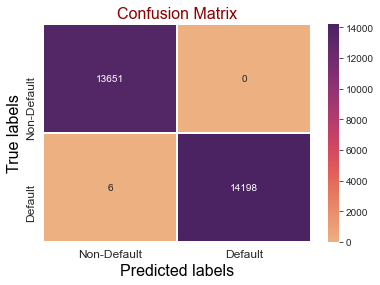

Confusion matrix values
 [[13651     0]
 [    6 14198]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     13651
           1      1.000     1.000     1.000     14204

    accuracy                          1.000     27855
   macro avg      1.000     1.000     1.000     27855
weighted avg      1.000     1.000     1.000     27855



ROC_AUC score : 99.979%


In [142]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_jnt_adasyn_cat=metrics.confusion_matrix(y_joint_adasyn,y_pred_joint_adasyn_cat)

ax= plt.subplot()
sns.heatmap(cm_jnt_adasyn_cat, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_jnt_adasyn_cat)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(y_joint_adasyn,y_pred_joint_adasyn_cat,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(y_joint_adasyn,y_pred_joint_adasyn_cat)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

#### Evaluating the test dataset

In [143]:
# prediction for test dataset
y_test_pred_joint_adasyn_cat=cat_clf_joint_adasyn.predict(joint_X_test)

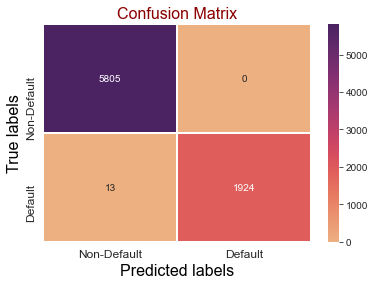

Confusion matrix values
 [[5805    0]
 [  13 1924]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999      5805
           1      1.000     0.993     0.997      1937

    accuracy                          0.998      7742
   macro avg      0.999     0.997     0.998      7742
weighted avg      0.998     0.998     0.998      7742



ROC_AUC score : 99.664%


In [144]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_jnt_test_adasyn_cat=metrics.confusion_matrix(joint_y_test,y_test_pred_joint_adasyn_cat)

ax= plt.subplot()
sns.heatmap(cm_jnt_test_adasyn_cat, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_jnt_test_adasyn_cat)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_test_pred_joint_adasyn_cat,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(joint_y_test,y_test_pred_joint_adasyn_cat)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Explainability of the result

In [147]:
# compiling the test dataset
start_time = timer(None) # start time

xpl_jnt_cat = SmartExplainer()
xpl_jnt_cat.compile(
    x=joint_X_test,
    model=cat_clf_joint_adasyn,
   
)

timer(start_time)   # end time

Backend: Shap TreeExplainer

 Time taken: 0 hours 0 minutes and 3.06 seconds.


In [146]:
# reassigning the index to test prediction result 
y_test_pred_jnt_adasyn_cat=pd.Series(y_test_pred_joint_adasyn_cat)
y_test_pred_jnt_adasyn_cat.index=joint_y_test.index
y_test_pred_jnt_adasyn_cat.head()

6721     0
12582    0
19905    0
13375    0
1284     0
dtype: int64

In [148]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_jnt_cat = xpl_jnt_cat.to_smartpredictor()
predictor_jnt_cat.add_input(x=joint_X_test, ypred=y_test_pred_jnt_adasyn_cat)
detailed_contributions_jnt_cat = predictor_jnt_cat.detail_contributions()

timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 7.23 seconds.


In [149]:
# top 5 rows of feature contribution of the predicted result
detailed_contributions_jnt_cat.head()

,ypred,proba,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,annual_inc_joint,dti_joint,verification_status_joint,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range
6721,0,0.997861,3.474545,-0.051178,-0.022109,1.464689,-0.000846,-0.011365,0.089171,-0.005984,0.069083,-0.004345,-0.00585,0.018617,-0.002432,-0.000655,0.107025,-0.014762,0.002204,-0.100766,-0.000448,-0.005635,0.008224,0.000134,0.056085,0.007896,-0.016785,-0.028048,-0.27006,0.284294,-0.290422,3.041481,-0.234832,0.106471,0.015503,0.004162,0.01949,0.007474,0.02691,0.059364,0.023588,0.022365,0.015773,-0.000405,0.058019,0.080265,-0.00477,-0.001094,-0.012969,-0.013239,0.00893,-0.016895,0.016368,-0.003472,-0.00897,-0.012302,-0.007003,0.014395,0.033706,0.003554,-0.030249,-0.010812,-0.021178,-0.010686,-0.060228,-0.008989,-0.011817,0.003479,-0.00531,-0.002845,-0.007172,0.006291,0.000933,-0.001086,0.00396,-0.006448,0.033305,-0.001999,0.02071,-0.012222,-0.000312,-0.133772,0.046323,0.012996,-0.005798,-0.005754,0.013753,-0.0,0.030729,-0.010975,-0.004622
12582,0,0.999413,-0.929431,0.24157,-0.02481,-0.238168,-0.000442,-0.012735,0.006609,-0.005984,-0.012411,-0.003979,0.011976,0.010181,-0.001467,-0.000667,-0.00501,-0.016403,0.000161,0.045779,-0.000408,0.00218,-0.014064,0.006916,0.014903,0.003416,0.298356,0.367933,7.209241,-0.670413,-0.164216,2.698504,0.419415,-0.015578,0.003591,-0.00934,-0.0072,-0.005447,0.045609,0.017021,0.00232,0.033926,0.006103,0.000283,0.044688,-0.023644,-0.003107,0.002288,-0.012643,0.002756,0.010223,0.000109,0.004689,-0.004559,-0.015029,0.01224,0.002488,-0.07572,-0.078647,0.011032,-0.006891,-0.004909,-0.026236,0.001392,0.050606,0.035354,-0.009883,0.004386,-0.008342,-0.00229,0.05716,0.009764,0.004391,-0.017608,0.092541,0.005737,0.026635,-0.00812,0.013376,-0.040767,-0.023213,-0.178033,-0.016116,-0.010735,-0.009535,-0.002498,-0.007102,-0.0,0.028377,-0.032243,-0.00319
19905,0,0.999732,-1.204718,0.100012,-0.025353,-0.69986,-0.000871,-0.017019,-0.012311,-0.009639,0.068751,-0.009092,-0.009301,-0.04689,-0.001576,-0.000302,-0.004328,0.019404,0.001309,0.047093,-0.001128,0.014225,-0.031917,-0.011419,0.017023,0.006886,0.300262,0.371997,7.344534,0.186158,0.088906,2.785753,-0.050795,-0.01905,0.006757,0.011939,-0.000649,0.037096,0.012247,0.001406,-0.007371,0.035676,-0.003844,-0.000247,0.056961,0.052091,-0.004657,0.001805,-0.004458,-0.006931,-0.002937,-0.037964,0.006336,0.030597,0.028234,-0.006082,-0.011489,0.024722,0.118059,0.090453,-0.02888,0.08385,0.087847,0.005217,0.040467,-0.021501,0.0092,0.00352,0.024389,-0.006305,0.048731,0.01267,-0.014596,-0.004311,-0.010444,-0.00967,0.002287,0.035979,-0.019681,0.116185,-0.021325,-0.163393,0.006876,0.025336,-0.008572,0.016466,0.02949,-0.0,0.025948,-0.008713,0.009611
13375,0,0.998567,-0.233798,0.224801,-0.020298,0.116385,-0.00035,-0.008714,-0.009869,-0.005984,-0.01455,-0.00459,-0.010119,0.021735,-0.000926,-0.000667,0.009082,0.033081,-0

In [150]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_jnt_cat.modify_mask(max_contrib=5)
explanation_jnt_cat = predictor_jnt_cat.summarize()

timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 3.14 seconds.


In [152]:
# top 5 rows of the predicted result with top 5 feature contribution
explanation_jnt_cat.head()

,ypred,proba,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3,feature_4,value_4,contribution_4,feature_5,value_5,contribution_5
6721,0,0.997861,loan_amnt,-1.151138,3.474545,last_pymnt_amnt,-0.512668,3.041481,installment,-0.988792,1.464689,last_pymnt_d,102018.0,-0.290422,total_rec_int,-0.391834,0.284294
12582,0,0.999413,total_rec_prncp,0.865899,7.209241,last_pymnt_amnt,0.503974,2.698504,loan_amnt,0.571947,-0.929431,total_rec_int,2.403174,-0.670413,last_credit_pull_d,102018.0,0.419415
19905,0,0.999732,total_rec_prncp,2.176909,7.344534,last_pymnt_amnt,2.79701,2.785753,loan_amnt,2.026027,-1.204718,installment,1.237289,-0.69986,total_pymnt_inv,1.942313,0.371997
13375,0,0.998567,total_rec_prncp,0.428895,5.810685,last_pymnt_amnt,0.126667,2.746058,total_rec_int,2.091195,-0.595278,last_credit_pull_d,102018.0,0.440823,loan_amnt,0.087254,-0.233798
1284,0,0.999665,total_rec_prncp,-0.008108,4.344842,last_pymnt_amnt,0.196311,2.967277,loan_amnt,-0.39744,1.120836,last_credit_pull_d,112018.0,0.407641,sec_app_inq_last_6mths,-1.079269,0.379076


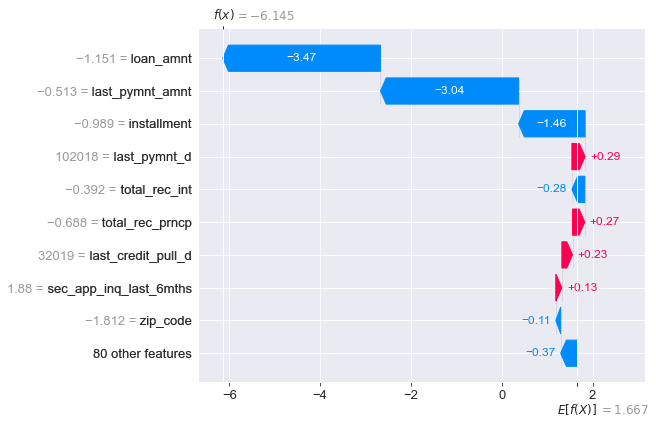


 Time taken: 0 hours 0 minutes and 4.74 seconds.


In [154]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explanation_jnt_cat = shap.Explainer(cat_clf_joint_adasyn)
shap_values_jnt_cat = explanation_jnt_cat(joint_X_test)
shap.plots.waterfall(shap_values_jnt_cat[0])

timer(start_time)   # end time

In [155]:
# plotting the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values_jnt_cat[0])

### Stacking Model

#### Model Learning

In [156]:
# initializing the classifier
clf1 = XGBClassifier(random_state=100)
clf2 = LGBMClassifier(random_state=100)
clf3 = CatBoostClassifier(random_state=100)
lr = LogisticRegression(random_state=100)
sclf_joint_adasyn = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

# fitting the model on train dataset
sclf_joint_adasyn.fit(X_joint_adasyn,y_joint_adasyn)

[13:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.042649
0:	learn: 0.5760561	total: 40ms	remaining: 39.9s
1:	learn: 0.5009206	total: 75.5ms	remaining: 37.7s
2:	learn: 0.4199740	total: 108ms	remaining: 35.9s
3:	learn: 0.3585704	total: 142ms	remaining: 35.3s
4:	learn: 0.3073526	total: 175ms	remaining: 34.9s
5:	learn: 0.2690715	total: 208ms	remaining: 34.4s
6:	learn: 0.2297910	total: 247ms	remaining: 35s
7:	learn: 0.1992233	total: 283ms	remaining: 35.1s
8:	learn: 0.1718770	total: 315ms	remaining: 34.7s
9:	learn: 0.1527794	total: 349ms	remaining: 34.5s
10:	learn: 0.1350433	total: 381ms	remaining: 34.3s
11:	learn: 0.1196387	total: 412ms	remaining: 33.9s
12:	learn: 0.1067486	total: 444ms	remaining: 33.7s
13:	learn

155:	learn: 0.0065955	total: 4.79s	remaining: 25.9s
156:	learn: 0.0065612	total: 4.82s	remaining: 25.9s
157:	learn: 0.0064744	total: 4.85s	remaining: 25.8s
158:	learn: 0.0064476	total: 4.88s	remaining: 25.8s
159:	learn: 0.0063930	total: 4.91s	remaining: 25.8s
160:	learn: 0.0063580	total: 4.94s	remaining: 25.7s
161:	learn: 0.0063244	total: 4.97s	remaining: 25.7s
162:	learn: 0.0062984	total: 5s	remaining: 25.7s
163:	learn: 0.0062467	total: 5.03s	remaining: 25.7s
164:	learn: 0.0062225	total: 5.06s	remaining: 25.6s
165:	learn: 0.0061831	total: 5.09s	remaining: 25.6s
166:	learn: 0.0061586	total: 5.12s	remaining: 25.6s
167:	learn: 0.0060705	total: 5.15s	remaining: 25.5s
168:	learn: 0.0060310	total: 5.18s	remaining: 25.5s
169:	learn: 0.0059980	total: 5.22s	remaining: 25.5s
170:	learn: 0.0059706	total: 5.25s	remaining: 25.4s
171:	learn: 0.0059202	total: 5.28s	remaining: 25.4s
172:	learn: 0.0058834	total: 5.31s	remaining: 25.4s
173:	learn: 0.0058720	total: 5.34s	remaining: 25.3s
174:	learn: 0.0

318:	learn: 0.0030333	total: 9.65s	remaining: 20.6s
319:	learn: 0.0030191	total: 9.68s	remaining: 20.6s
320:	learn: 0.0030191	total: 9.71s	remaining: 20.5s
321:	learn: 0.0029724	total: 9.73s	remaining: 20.5s
322:	learn: 0.0029673	total: 9.76s	remaining: 20.5s
323:	learn: 0.0029673	total: 9.79s	remaining: 20.4s
324:	learn: 0.0029657	total: 9.82s	remaining: 20.4s
325:	learn: 0.0029657	total: 9.84s	remaining: 20.3s
326:	learn: 0.0029498	total: 9.86s	remaining: 20.3s
327:	learn: 0.0029293	total: 9.89s	remaining: 20.3s
328:	learn: 0.0029293	total: 9.91s	remaining: 20.2s
329:	learn: 0.0029293	total: 9.93s	remaining: 20.2s
330:	learn: 0.0029293	total: 9.96s	remaining: 20.1s
331:	learn: 0.0029259	total: 9.98s	remaining: 20.1s
332:	learn: 0.0029259	total: 10s	remaining: 20s
333:	learn: 0.0029259	total: 10s	remaining: 20s
334:	learn: 0.0029259	total: 10.1s	remaining: 20s
335:	learn: 0.0029259	total: 10.1s	remaining: 19.9s
336:	learn: 0.0029259	total: 10.1s	remaining: 19.9s
337:	learn: 0.0029259	

483:	learn: 0.0026101	total: 13.9s	remaining: 14.8s
484:	learn: 0.0026100	total: 13.9s	remaining: 14.8s
485:	learn: 0.0026100	total: 13.9s	remaining: 14.7s
486:	learn: 0.0026100	total: 14s	remaining: 14.7s
487:	learn: 0.0026100	total: 14s	remaining: 14.7s
488:	learn: 0.0026100	total: 14s	remaining: 14.6s
489:	learn: 0.0026100	total: 14s	remaining: 14.6s
490:	learn: 0.0026100	total: 14.1s	remaining: 14.6s
491:	learn: 0.0026100	total: 14.1s	remaining: 14.5s
492:	learn: 0.0026100	total: 14.1s	remaining: 14.5s
493:	learn: 0.0026099	total: 14.1s	remaining: 14.5s
494:	learn: 0.0026099	total: 14.2s	remaining: 14.4s
495:	learn: 0.0026099	total: 14.2s	remaining: 14.4s
496:	learn: 0.0026099	total: 14.2s	remaining: 14.4s
497:	learn: 0.0026043	total: 14.2s	remaining: 14.4s
498:	learn: 0.0026043	total: 14.3s	remaining: 14.3s
499:	learn: 0.0026043	total: 14.3s	remaining: 14.3s
500:	learn: 0.0026043	total: 14.3s	remaining: 14.3s
501:	learn: 0.0026043	total: 14.3s	remaining: 14.2s
502:	learn: 0.002604

643:	learn: 0.0025936	total: 18s	remaining: 9.96s
644:	learn: 0.0025936	total: 18s	remaining: 9.93s
645:	learn: 0.0025936	total: 18.1s	remaining: 9.9s
646:	learn: 0.0025936	total: 18.1s	remaining: 9.87s
647:	learn: 0.0025936	total: 18.1s	remaining: 9.84s
648:	learn: 0.0025936	total: 18.1s	remaining: 9.81s
649:	learn: 0.0025936	total: 18.2s	remaining: 9.78s
650:	learn: 0.0025936	total: 18.2s	remaining: 9.75s
651:	learn: 0.0025935	total: 18.2s	remaining: 9.72s
652:	learn: 0.0025935	total: 18.2s	remaining: 9.69s
653:	learn: 0.0025935	total: 18.3s	remaining: 9.66s
654:	learn: 0.0025936	total: 18.3s	remaining: 9.63s
655:	learn: 0.0025935	total: 18.3s	remaining: 9.6s
656:	learn: 0.0025870	total: 18.3s	remaining: 9.57s
657:	learn: 0.0025870	total: 18.4s	remaining: 9.55s
658:	learn: 0.0025870	total: 18.4s	remaining: 9.52s
659:	learn: 0.0025870	total: 18.4s	remaining: 9.49s
660:	learn: 0.0025870	total: 18.4s	remaining: 9.46s
661:	learn: 0.0025870	total: 18.5s	remaining: 9.43s
662:	learn: 0.0025

803:	learn: 0.0025759	total: 22s	remaining: 5.37s
804:	learn: 0.0025759	total: 22s	remaining: 5.34s
805:	learn: 0.0025759	total: 22.1s	remaining: 5.31s
806:	learn: 0.0025759	total: 22.1s	remaining: 5.28s
807:	learn: 0.0025759	total: 22.1s	remaining: 5.25s
808:	learn: 0.0025759	total: 22.1s	remaining: 5.22s
809:	learn: 0.0025758	total: 22.2s	remaining: 5.2s
810:	learn: 0.0025758	total: 22.2s	remaining: 5.17s
811:	learn: 0.0025758	total: 22.2s	remaining: 5.14s
812:	learn: 0.0025758	total: 22.2s	remaining: 5.12s
813:	learn: 0.0025758	total: 22.3s	remaining: 5.09s
814:	learn: 0.0025758	total: 22.3s	remaining: 5.06s
815:	learn: 0.0025758	total: 22.3s	remaining: 5.03s
816:	learn: 0.0025758	total: 22.3s	remaining: 5s
817:	learn: 0.0025758	total: 22.4s	remaining: 4.98s
818:	learn: 0.0025758	total: 22.4s	remaining: 4.95s
819:	learn: 0.0025758	total: 22.4s	remaining: 4.92s
820:	learn: 0.0025758	total: 22.4s	remaining: 4.89s
821:	learn: 0.0025757	total: 22.5s	remaining: 4.87s
822:	learn: 0.002575

962:	learn: 0.0025625	total: 25.9s	remaining: 996ms
963:	learn: 0.0025625	total: 25.9s	remaining: 968ms
964:	learn: 0.0025625	total: 26s	remaining: 941ms
965:	learn: 0.0025625	total: 26s	remaining: 914ms
966:	learn: 0.0025624	total: 26s	remaining: 887ms
967:	learn: 0.0025624	total: 26s	remaining: 860ms
968:	learn: 0.0025624	total: 26s	remaining: 833ms
969:	learn: 0.0025624	total: 26.1s	remaining: 806ms
970:	learn: 0.0025624	total: 26.1s	remaining: 779ms
971:	learn: 0.0025624	total: 26.1s	remaining: 752ms
972:	learn: 0.0025624	total: 26.1s	remaining: 725ms
973:	learn: 0.0025624	total: 26.2s	remaining: 698ms
974:	learn: 0.0025624	total: 26.2s	remaining: 672ms
975:	learn: 0.0025624	total: 26.2s	remaining: 645ms
976:	learn: 0.0025623	total: 26.2s	remaining: 618ms
977:	learn: 0.0025623	total: 26.3s	remaining: 591ms
978:	learn: 0.0025623	total: 26.3s	remaining: 564ms
979:	learn: 0.0025623	total: 26.3s	remaining: 537ms
980:	learn: 0.0025623	total: 26.3s	remaining: 510ms
981:	learn: 0.0025623	

StackingClassifier(classifiers=[XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=N...
                                 

In [157]:
# prediction for train dataset 
y_pred_train_jnt_adasyn_stack=sclf_joint_adasyn.predict(X_joint_adasyn)

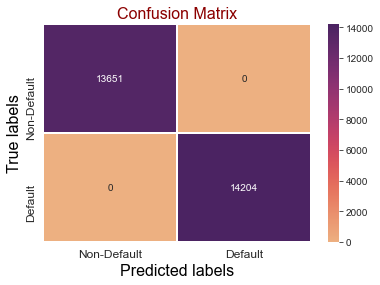

Confusion matrix values
 [[13651     0]
 [    0 14204]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     13651
           1      1.000     1.000     1.000     14204

    accuracy                          1.000     27855
   macro avg      1.000     1.000     1.000     27855
weighted avg      1.000     1.000     1.000     27855



ROC_AUC score : 100.0%


In [158]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_jnt_adasyn_stack=metrics.confusion_matrix(y_joint_adasyn,y_pred_train_jnt_adasyn_stack)

ax= plt.subplot()
sns.heatmap(cm_train_jnt_adasyn_stack, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_jnt_adasyn_stack)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(y_joint_adasyn,y_pred_train_jnt_adasyn_stack,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(y_joint_adasyn,y_pred_train_jnt_adasyn_stack)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

#### Evaluating the test dataset

In [159]:
y_pred_test_jnt_adasyn_stack=sclf_joint_adasyn.predict(joint_X_test)

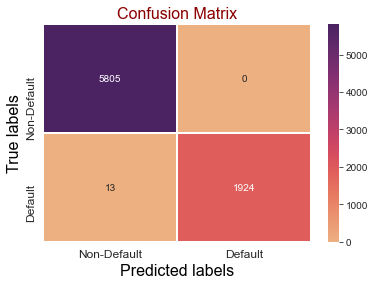

Confusion matrix values
 [[5805    0]
 [  13 1924]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999      5805
           1      1.000     0.993     0.997      1937

    accuracy                          0.998      7742
   macro avg      0.999     0.997     0.998      7742
weighted avg      0.998     0.998     0.998      7742



ROC_AUC score : 99.664%


In [160]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_jnt_test_adasyn_stack=metrics.confusion_matrix(joint_y_test,y_pred_test_jnt_adasyn_stack)

ax= plt.subplot()
sns.heatmap(cm_jnt_test_adasyn_stack, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_jnt_test_adasyn_stack)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_pred_test_jnt_adasyn_stack,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(joint_y_test,y_pred_test_jnt_adasyn_stack)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

# End of the process

In [162]:
timer(start_time_adasyn) # end of the timer of the process


 Time taken: 0 hours 0 minutes and 7.18 seconds.
